# Part 1: Data Pre-Processing

## 1) Loading Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2) Loading Dataset

In [2]:
df= pd.read_excel(r'Data\AirQualityUCI.xlsx')
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

## 3) Exploring the dataset

In [3]:
# As per the website the missing values are represented by -200. So we will replace -200 with NaN
df = df.replace(-200, np.nan)

In [4]:
# Checking the basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [5]:
# Printing total number of missing values in each column
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### Observation
- The dataset has total 9357 datapoints.
- Apart from date and time all the columns have missing values, which will be handled using `ffill()` method as we are dealing with time series data as well as it helps in saving datapoints from being dropped.
- The column `NMHC(GT)` column has almost all the values null so it will dropped as it will not be able to contribute much in the dataset.

In [6]:
# Dropping the NMHC(GT) column
df.drop('NMHC(GT)', axis=1, inplace=True)

# Handling the missing values using ffill
df = df.fillna(method='ffill')

# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [7]:
df.describe(include="all").T

count unique       top freq                           mean  \
Date             9357    NaN       NaN  NaN  2004-09-21 04:30:05.193972480   
Time             9357     24  18:00:00  390                            NaN   
CO(GT)         9357.0    NaN       NaN  NaN                       2.082195   
PT08.S1(CO)    9357.0    NaN       NaN  NaN                    1102.604396   
C6H6(GT)       9357.0    NaN       NaN  NaN                      10.190299   
PT08.S2(NMHC)  9357.0    NaN       NaN  NaN                     942.422741   
NOx(GT)        9357.0    NaN       NaN  NaN                     240.718147   
PT08.S3(NOx)   9357.0    NaN       NaN  NaN                     832.618539   
NO2(GT)        9357.0    NaN       NaN  NaN                     109.401453   
PT08.S4(NO2)   9357.0    NaN       NaN  NaN                    1452.890358   
PT08.S5(O3)    9357.0    NaN       NaN  NaN                    1030.388426   
T              9357.0    NaN       NaN  NaN                      18.315768   
RH             9357.0    NaN       NaN  NaN                      48.814853   
AH             9357.0    NaN       NaN  NaN                       1.017382   

                               min                  25%                  50%  \
Date           2004-03-10 00:00:00  2004-06-16 00:00:00  2004-09-21 00:00:00   
Time                           NaN                  NaN                  NaN   
CO(GT)                         0.1                  1.0                  1.7   
PT08.S1(CO)                 647.25               938.25               1061.5   
C6H6(GT)                  0.149048             4.401596             8.276765   
PT08.S2(NMHC)               383.25                732.5                910.5   
NOx(GT)                        2.0                 97.0                174.0   
PT08.S3(NOx)                 322.0                654.5               806.75   
NO2(GT)                        2.0                 73.0                102.0   
PT08.S4(NO2)                 551.0              1227.75              1459.75   
PT08.S5(O3)                  221.0                726.0               963.75   
T                             -1.9               11.875               17.575   
RH                           9.175               35.425            48.925001   
AH                        0.184679             0.726213             0.987539   

                               75%                  max         std  
Date           2004-12-28 00:00:00  2005-04-04 00:00:00         NaN  
Time                           NaN                  NaN         NaN  
CO(GT)                         2.8                 11.9    1.469801  
PT08.S1(CO)                1237.25              2039.75  219.599578  
C6H6(GT)                 14.019301            63.741476    7.565011  
PT08.S2(NMHC)              1117.25               2214.0  269.583076  
NOx(GT)                      318.0               1479.0  206.611257  
PT08.S3(NOx)                 967.5              2682.75  255.704654  
NO2(GT)                      137.0                339.7   47.210774  
PT08.S4(NO2)               1676.75               2775.0  347.427351  
PT08.S5(O3)                 1286.5              2522.75  410.906048  
T                           24.325                 44.6    8.822898  
RH                          61.875               88.725   17.354492  
AH                        1.306671             2.231036    0.404829

### Observation
1. The dataset contains **9357 observations** after taking care of null values.



2. **Temperature (T) Analysis**:
    - `Average temperature`: ~*18.32°C*
    - `Range`: *-1.9°C to 44.6°C*
    - `Standard deviation`: *8.82°C*
    - Shows typical seasonal variation with a reasonable spread



3. **Air Quality Measurements**:
    - **CO(GT)**:
        - `Mean`: *2.08*
        - `Range`: *0.1 to 11.9*
        - Low `standard deviation` (*1.47*) suggests relatively stable CO levels
          <br><br>
    - **NOx(GT)**:
        - `Mean`: *240.72*
        - `Wide range`: *2.0 to 1479.0*
        - High `standard deviation` (*206.61*) indicates significant variation



4. **Sensor Readings**:
    - **PT08.S4(NO2)** *(target variable)*:
        - `Mean`: *1452.89*
        - `Range`: *551.0 to 2775.0*
        - `Standard deviation`: *347.43*
        - Shows consistent readings with moderate variation


5. **Humidity Measurements**:
    - **Relative Humidity (RH)**:
        - `Mean`: *48.81%*
        - `Range`: *9.17% to 88.72%*
        - Shows expected variation for annual measurements
          <br><br>
    - **Absolute Humidity (AH)**:
        - `Mean`: *1.017*
        - `Range`: *0.183 to 2.231*
        - Shows expected correlation with temperature patterns

So based on above observation we can sum it up as:
- Most measurements show right-skewed distributions (mean > median)
- All sensors show reasonable ranges without extreme outliers
- Quartile distributions suggest normally distributed data for most measurements

#### For tasks in Part 1 of this notebook the target column is: PT08.S4(NO2)

In [8]:
# Storing the Date and Time columns for future use
datetime_cols = df[['Date', 'Time']].copy()

In [9]:
# Making a datetime index for time-series data
df['DateTime'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Time'].astype(str))
df = df.set_index('DateTime')

# Looking at first 5 values
df.head()

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  \
DateTime                                                                   
2004-03-10 18:00:00 2004-03-10  18:00:00     2.6      1360.00  11.881723   
2004-03-10 19:00:00 2004-03-10  19:00:00     2.0      1292.25   9.397165   
2004-03-10 20:00:00 2004-03-10  20:00:00     2.2      1402.00   8.997817   
2004-03-10 21:00:00 2004-03-10  21:00:00     2.2      1375.50   9.228796   
2004-03-10 22:00:00 2004-03-10  22:00:00     1.6      1272.25   6.518224   

                     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
DateTime                                                             
2004-03-10 18:00:00        1045.50    166.0       1056.25    113.0   
2004-03-10 19:00:00         954.75    103.0       1173.75     92.0   
2004-03-10 20:00:00         939.25    131.0       1140.00    114.0   
2004-03-10 21:00:00         948.25    172.0       1092.00    122.0   
2004-03-10 22:00:00         835.50    131.0       1205.00    116.0   

                     PT08.S4(NO2)  PT08.S5(O3)      T         RH        AH  
DateTime                                                                    
2004-03-10 18:00:00       1692.00      1267.50  13.60  48.875001  0.757754  
2004-03-10 19:00:00       1558.75       972.25  13.30  47.700000  0.725487  
2004-03-10 20:00:00       1554.50      1074.00  11.90  53.975000  0.750239  
2004-03-10 21:00:00       1583.75      1203.25  11.00  60.000000  0.786713  
2004-03-10 22:00:00       1490.00      1110.00  11.15  59.575001  0.788794

In [10]:
# Drop original Date and Time columns as not required for the immediate tasks at hand
df = df.drop(['Date', 'Time'], axis=1)

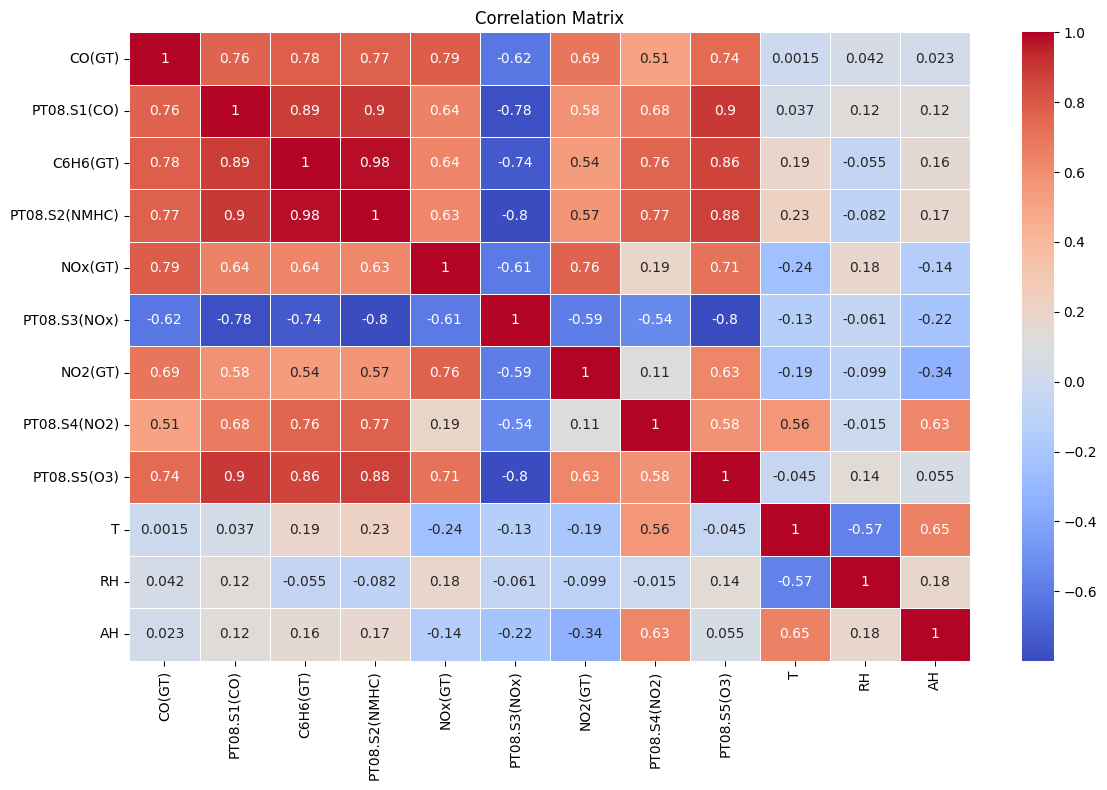

In [11]:
# Making correlation matrix to identify the highest correlated features with the target column PT08.S4(NO2)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [12]:
# Filtering features most correlated with PT08.S4(NO2)
correlations = correlation_matrix['PT08.S4(NO2)'].abs().sort_values(ascending=False)[1:]
print("\nColumns with highest Correlations with PT08.S4(NO2):")
print(correlations)


Columns with highest Correlations with PT08.S4(NO2):
PT08.S2(NMHC)    0.769774
C6H6(GT)         0.756338
PT08.S1(CO)      0.676419
AH               0.630271
PT08.S5(O3)      0.579183
T                0.558430
PT08.S3(NOx)     0.535239
CO(GT)           0.512433
NOx(GT)          0.194463
NO2(GT)          0.107364
RH               0.015138
Name: PT08.S4(NO2), dtype: float64


### Observation
- Based on the above correlation heat map:
    - `PT08.S2(NMHC)`
    - `C6H6(GT)`
    - `PT08.S1(CO)`
    - `AH`

Now these 4 features will be separated out for further tasks.

In [13]:
# Filtering out the top 4 correlated features plus target
selected_features = correlations[1:5].index.tolist()  
selected_features.append('PT08.S4(NO2)')  # Adding target column

# Creating new dataframe with highly correlated features for target column
df_selected = df[selected_features]

# Sample outpout
df_selected.head()

C6H6(GT)  PT08.S1(CO)        AH  PT08.S5(O3)  \
DateTime                                                             
2004-03-10 18:00:00  11.881723      1360.00  0.757754      1267.50   
2004-03-10 19:00:00   9.397165      1292.25  0.725487       972.25   
2004-03-10 20:00:00   8.997817      1402.00  0.750239      1074.00   
2004-03-10 21:00:00   9.228796      1375.50  0.786713      1203.25   
2004-03-10 22:00:00   6.518224      1272.25  0.788794      1110.00   

                     PT08.S4(NO2)  
DateTime                           
2004-03-10 18:00:00       1692.00  
2004-03-10 19:00:00       1558.75  
2004-03-10 20:00:00       1554.50  
2004-03-10 21:00:00       1583.75  
2004-03-10 22:00:00       1490.00

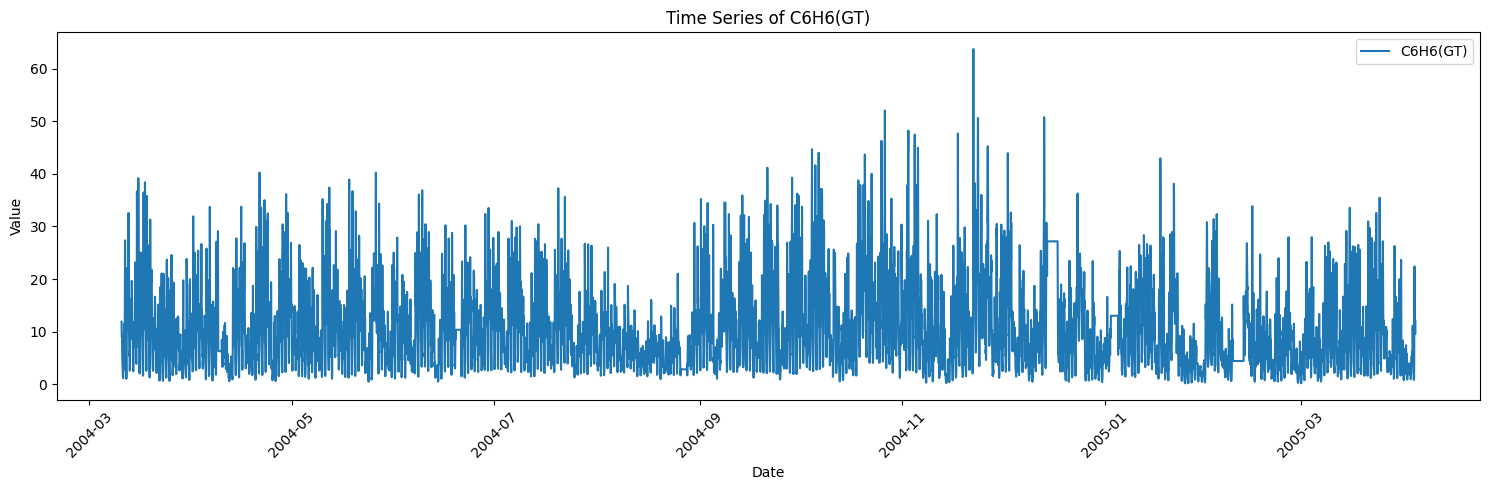

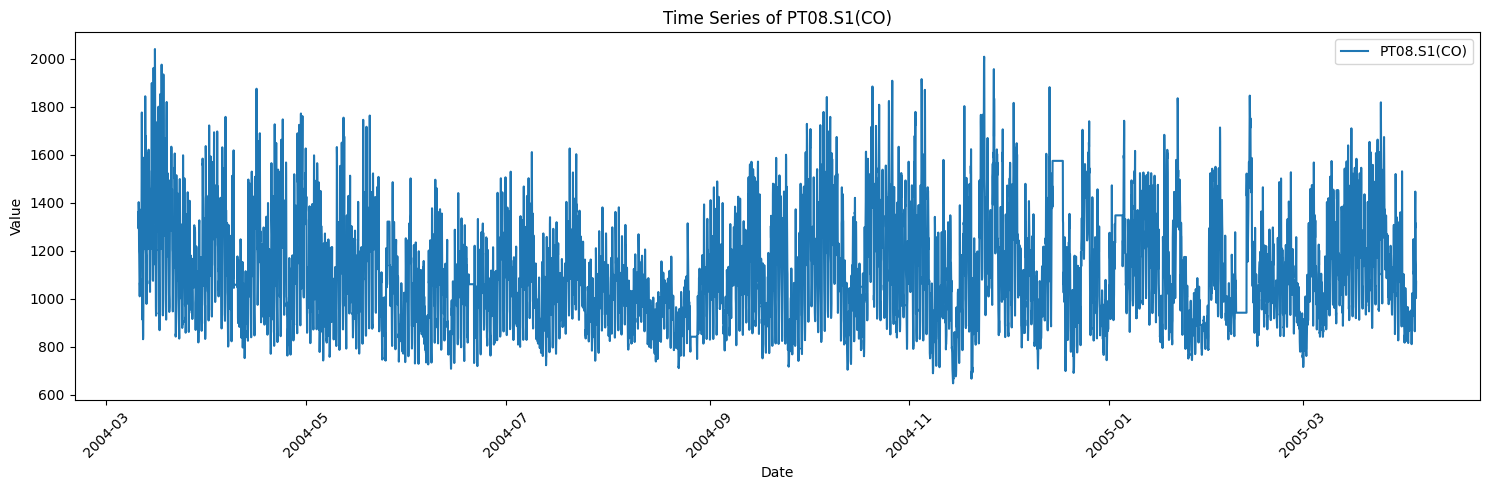

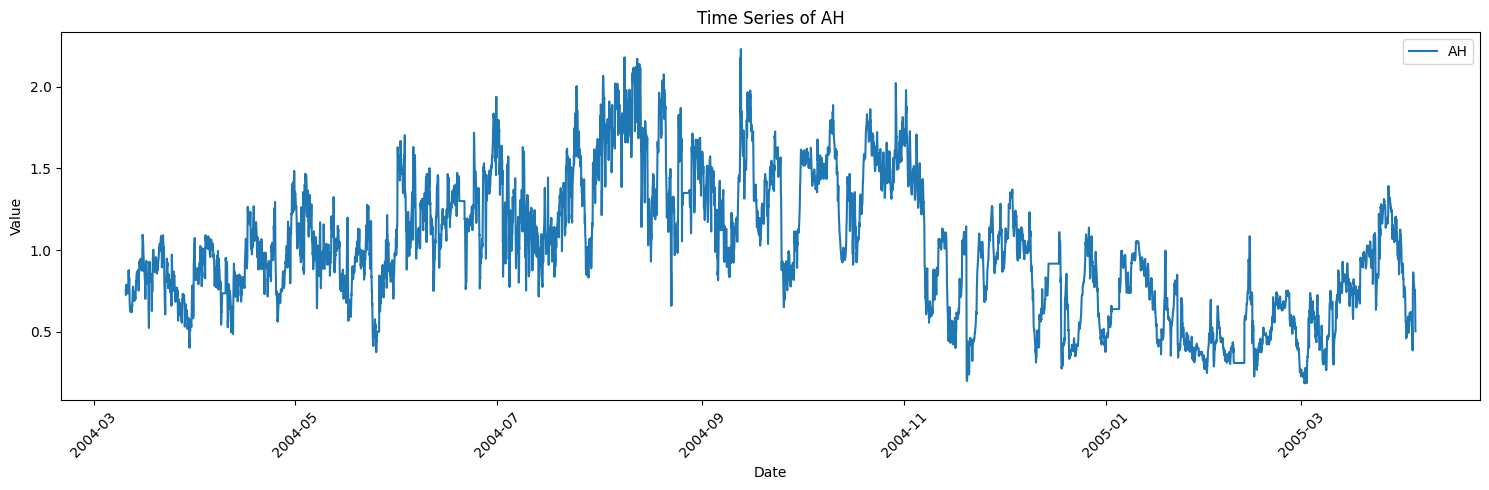

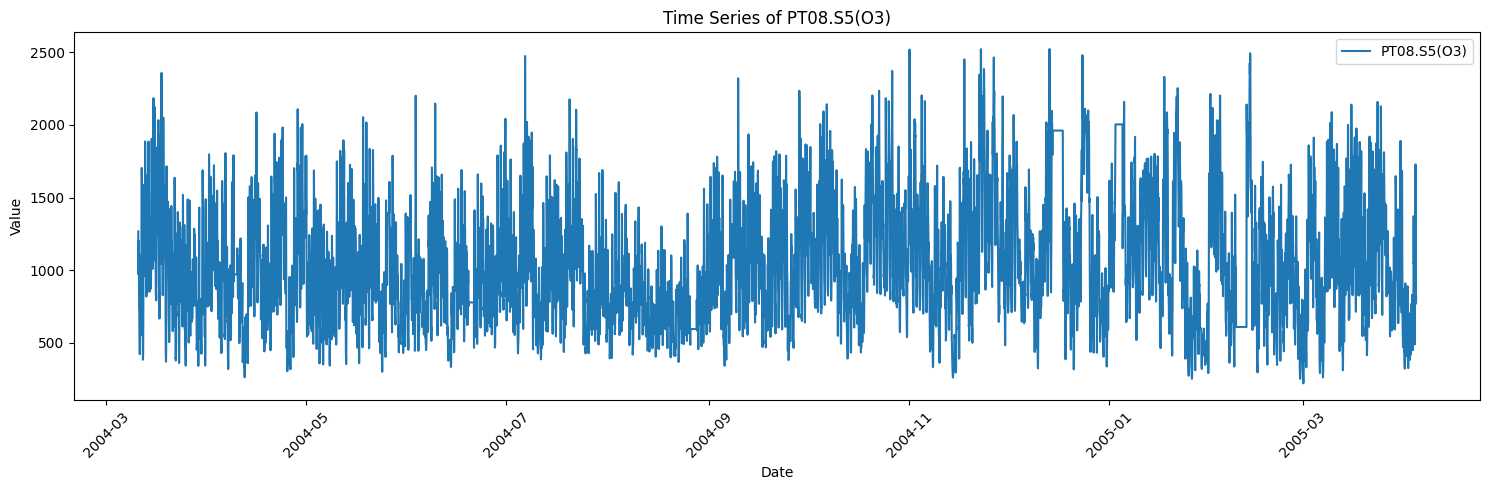

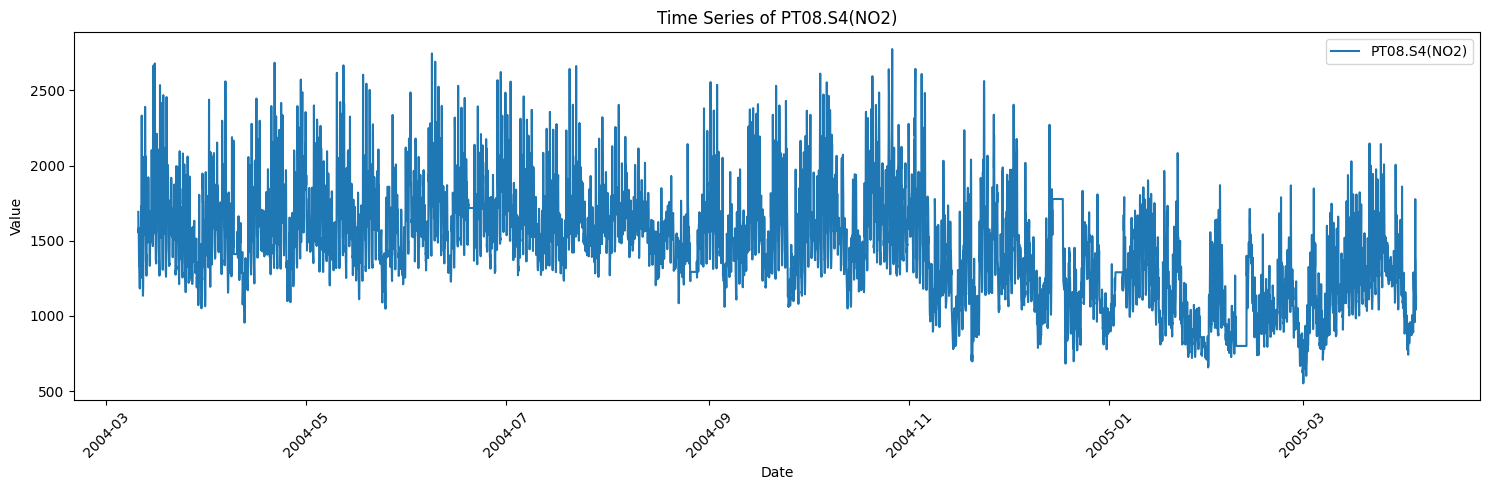

In [14]:
for column in df_selected.columns:
    plt.figure(figsize=(15, 5))
    plt.plot(df_selected.index, df_selected[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
# Implementing a Dickey-Fuller test function to check the stationarity of the featuress
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput

In [16]:
# Calling the function for test
for column in df_selected.columns:
    print(f"\n{'='*50}")
    print(f"Stationarity Test for {column}:")
    print(f"{'='*50}")
    check_stationarity(df_selected[column])
    print(f"{'='*50}")


Stationarity Test for C6H6(GT):
Results of Dickey-Fuller Test:
Test Statistic                -1.002591e+01
p-value                        1.632354e-17
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64

Stationarity Test for PT08.S1(CO):
Results of Dickey-Fuller Test:
Test Statistic                -9.876159e+00
p-value                        3.877564e-17
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64

Stationarity Test for AH:
Results of Dickey-Fuller Test:
Test Statistic                   -5.094234
p-value                           0.000014
#Lags Used                       25.000000
Number of Observations Used    9331.

In [17]:
# Function to plot rolling statistics for the time series feastures in dataset
def plot_rolling_statistics(timeseries, col_name, window=24):
    plt.figure(figsize=(15, 8))
    
    # Original values
    plt.plot(timeseries, label='Original')
    
    # Rolling mean
    rolling_mean = timeseries.rolling(window=window).mean()
    plt.plot(rolling_mean, label=f'Rolling Mean (window={window})')
    
    # Rolling std
    rolling_std = timeseries.rolling(window=window).std()
    plt.plot(rolling_std, label=f'Rolling Std (window={window})')

    name = 'Rolling Statistics for' + col_name
    plt.title(name)
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 1500x500 with 0 Axes>

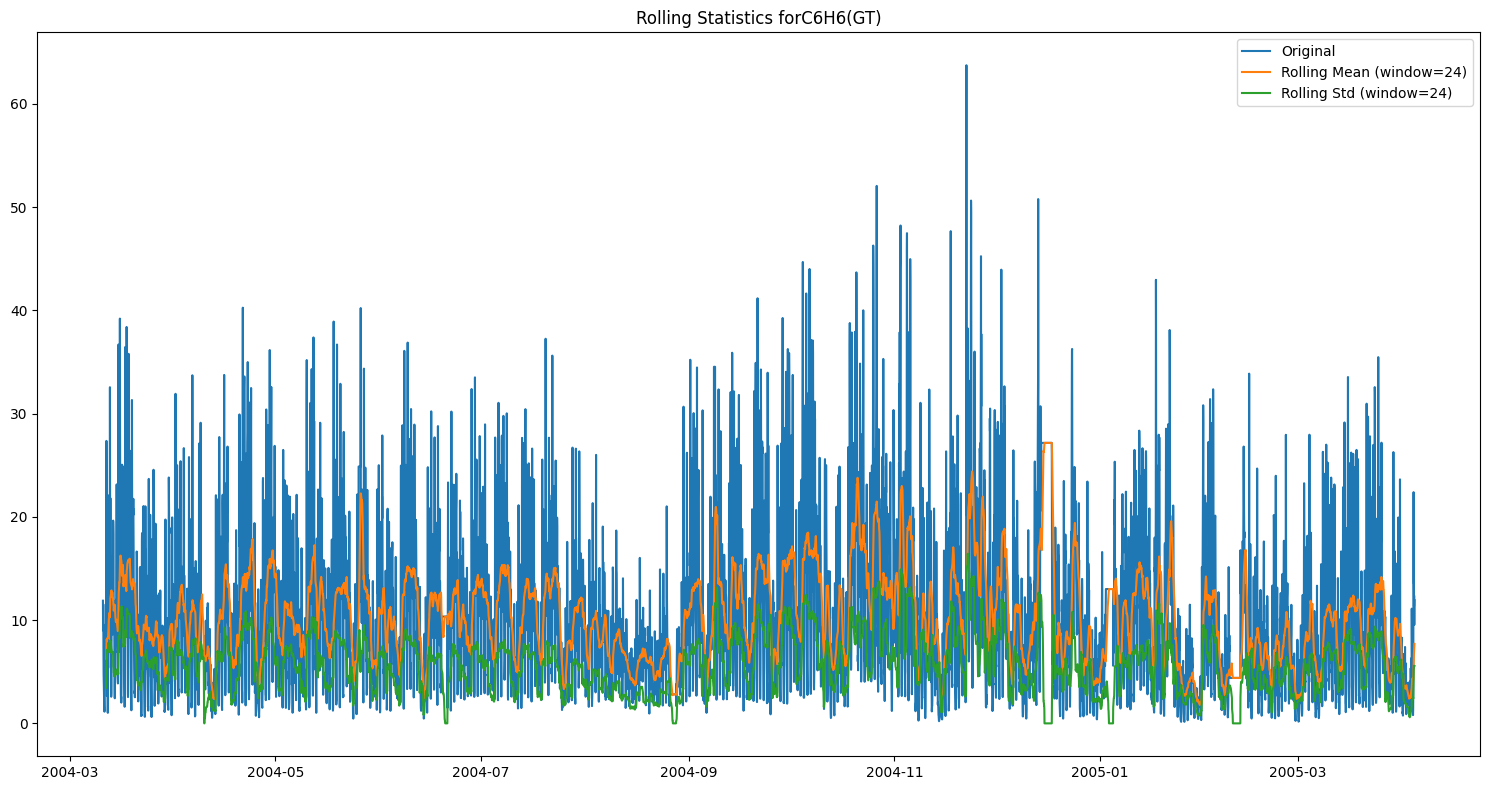

<Figure size 1500x500 with 0 Axes>

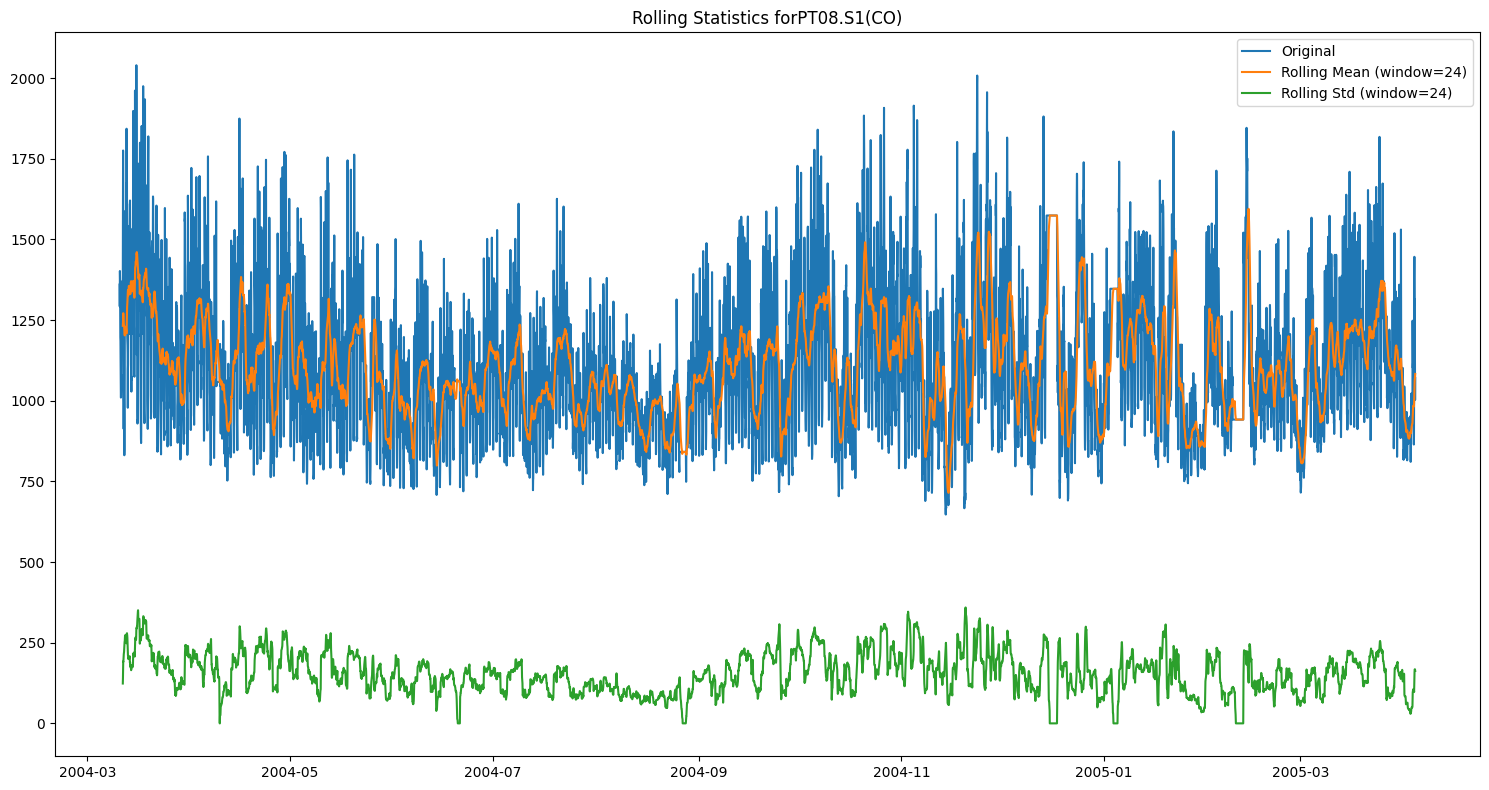

<Figure size 1500x500 with 0 Axes>

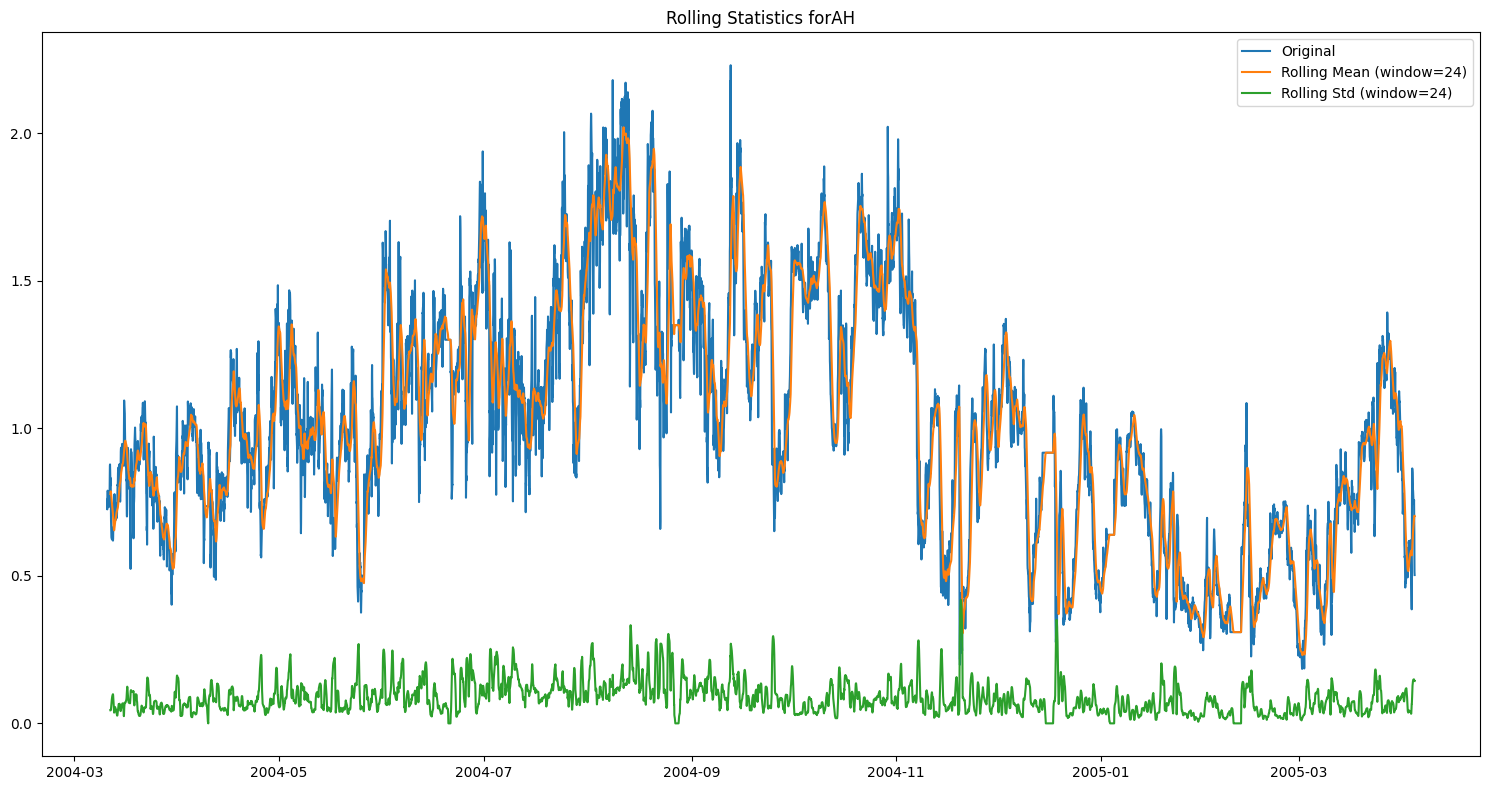

<Figure size 1500x500 with 0 Axes>

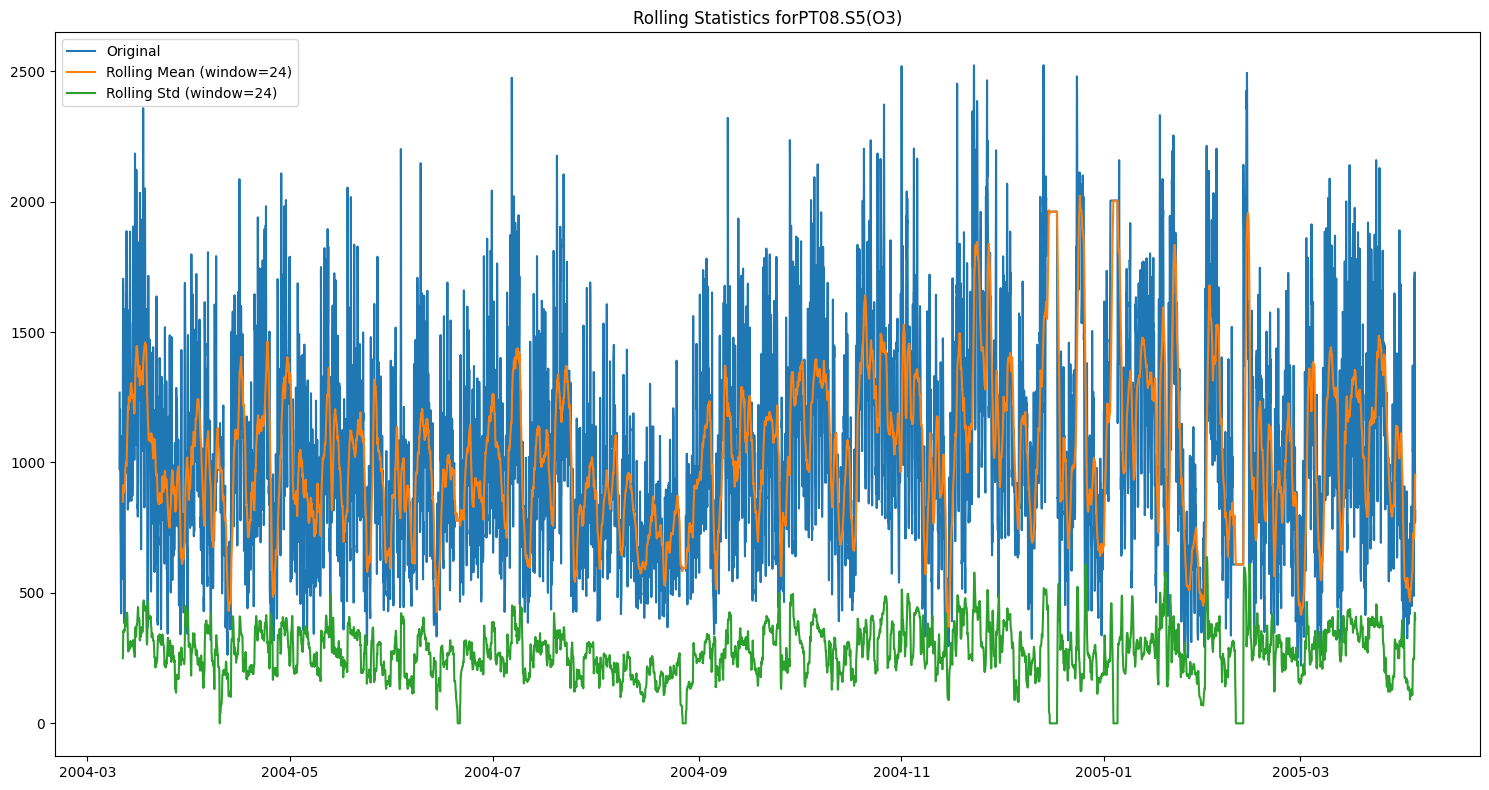

<Figure size 1500x500 with 0 Axes>

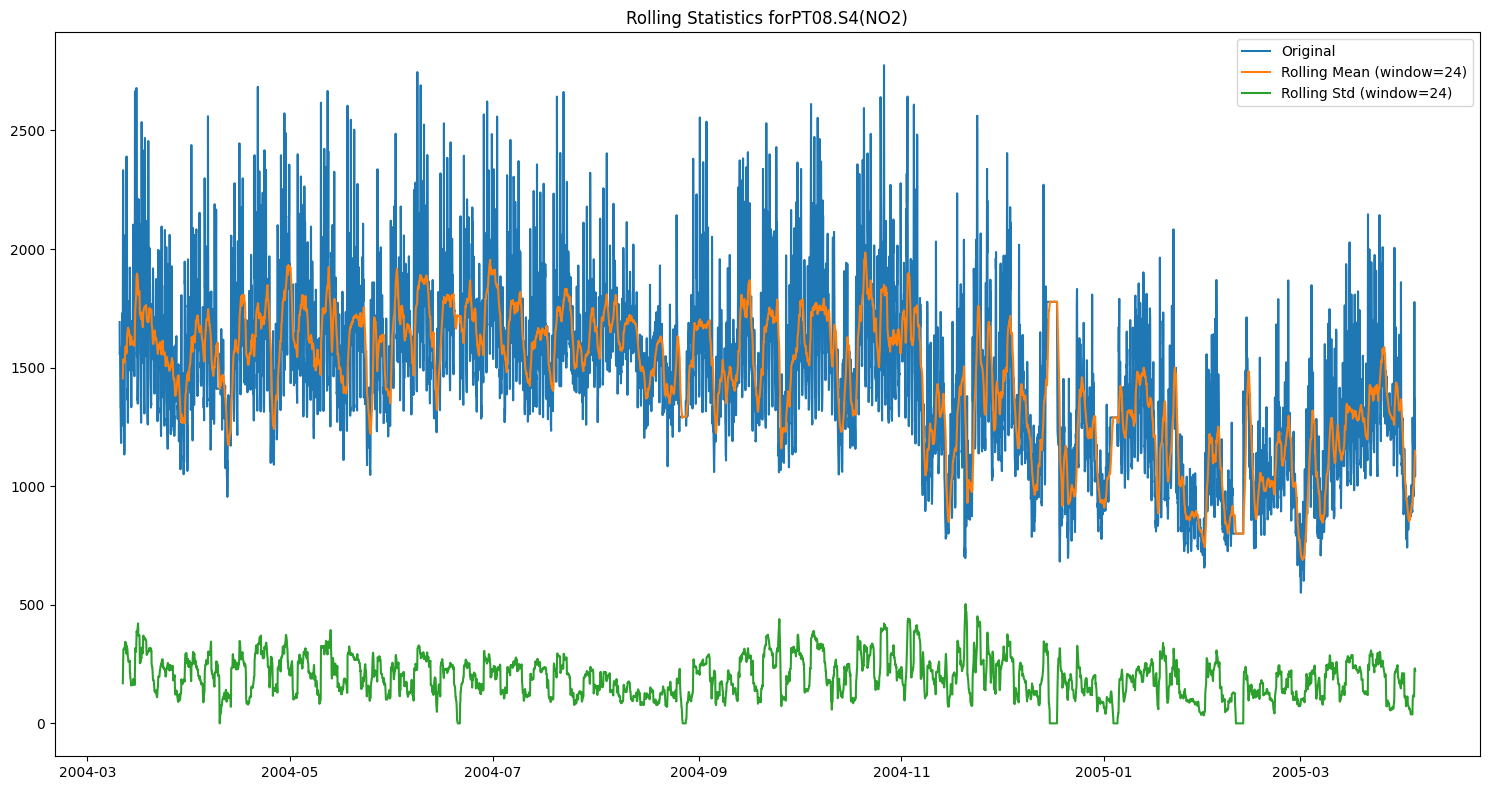

In [18]:
# Plotting rolling statistics for each feature
for column in df_selected.columns:
    plt.figure(figsize=(15, 5))
    
    plot_rolling_statistics(df_selected[column], str(column),24)
    
    plt.show()

### Observation

Based on the time-series plots, rolling statistics plot and the dick eyfuller test for each feature we can say that all features are stationary because:
- **All test statistics are more negative than their critical values**
- **All p-values are significantly smaller than 0.05**


- **Most Stationary Features (based on test statistic values)**:
    - `PT08.S5(O3)`: *-10.78*
    - `C6H6(GT)`: *-10.02*
    - `PT08.S1(CO)`: *-9.87*
      

- **Moderately Stationary**
    - `PT08.S4(NO2)` (**target**): *-6.23*


- **Least Stationary (but still stationary)**:
    - `AH`: *-5.09*


- **Confidence Levels**:
    - All features are stationary at all confidence levels (1%, 5%, and 10%)
    - Critical values are consistent across all features:
        - **1%: -3.43**
        - **5%: -2.86**
        - **10%: -2.57**


- **Statistical Significance**:
    - P-values range from extremely small (2.25e-19) to very small (1.4e-5):
        - `PT08.S5(O3)`: *2.25e-19* (most significant)
        - `C6H6(GT)`: *1.63e-17*
        - `PT08.S1(CO)`: *3.88e-17*
        - `PT08.S4(NO2)`: *4.96e-08*
        - `AH`: *1.4e-5* (least significant, but still highly significant)

So based on above pointers we can say that:
1. No need for differencing or additional transformations for stationarity
2. Data is suitable for time series analysis as is
3. High stationarity suggests good predictability potential
4. Consistent sample sizes (around 9320 observations) indicate reliable test results

## 4) Preparing the dataset for Model Building

In [19]:
# Importing Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
# initializing scaler object
scaler = MinMaxScaler()

# Applying min max scaler on the dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), 
                        columns=df_selected.columns, 
                        index=df_selected.index)

In [21]:
# Function to create custom sequences for the time series data
def create_sequences(data, seq_length):
    X = []
    y = []
    feature_names = [f'Feature_{i}' for i in range(data.shape[1])]
    column_names = [f'{name}_t{i}' for name in feature_names for i in range(seq_length)]
    
    for i in range(len(data) - seq_length):
        # Flatten the sequence into a 1D array for DataFrame
        seq = data[i:(i + seq_length)].values.flatten()
        X.append(seq)
        y.append(data.iloc[i + seq_length]['PT08.S4(NO2)'])
    
    return pd.DataFrame(X, columns=column_names), pd.Series(y, name='target')

In [22]:
# Initializing the sequence length as per instructions
seq_length = 10

# Creating sequences with help of custom functions
X, y = create_sequences(df_scaled, seq_length)

In [23]:
# Spliting data into train and test set with a split ratio of 80-20 
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nSequence Shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Sequence Shapes:
X_train shape: (7477, 50)
y_train shape: (7477,)
X_test shape: (1870, 50)
y_test shape: (1870,)


In [24]:
X_train.head()

Feature_0_t0  Feature_0_t1  Feature_0_t2  Feature_0_t3  Feature_0_t4  \
0      0.184498      0.511849      0.280046      0.454654      0.513040   
1      0.145428      0.463196      0.264279      0.326382      0.453125   
2      0.139148      0.542011      0.276374      0.370588      0.451214   
3      0.142780      0.522980      0.294198      0.426741      0.464366   
4      0.100156      0.448833      0.295215      0.386228      0.422212   

   Feature_0_t5  Feature_0_t6  Feature_0_t7  Feature_0_t8  Feature_0_t9  ...  \
0      0.145428      0.463196      0.264279      0.326382      0.453125  ...   
1      0.139148      0.542011      0.276374      0.370588      0.451214  ...   
2      0.142780      0.522980      0.294198      0.426741      0.464366  ...   
3      0.100156      0.448833      0.295215      0.386228      0.422212  ...   
4      0.072209      0.394794      0.293249      0.316390      0.378597  ...   

   Feature_4_t0  Feature_4_t1  Feature_4_t2  Feature_4_t3  Feature_4_t4  \
0      0.034444      0.320826      0.283499      0.173129      0.325989   
1      0.024336      0.260323      0.277067      0.121755      0.307442   
2      0.017999      0.261221      0.274544      0.097426      0.290355   
3      0.015480      0.300718      0.269689      0.087216      0.283723   
4      0.022876      0.290485      0.269071      0.108830      0.301371   

   Feature_4_t5  Feature_4_t6  Feature_4_t7  Feature_4_t8  Feature_4_t9  
0      0.024336      0.260323      0.277067      0.121755      0.307442  
1      0.017999      0.261221      0.274544      0.097426      0.290355  
2      0.015480      0.300718      0.269689      0.087216      0.283723  
3      0.022876      0.290485      0.269071      0.108830      0.301371  
4      0.048663      0.356732      0.272219      0.221027      0.354317  

[5 rows x 50 columns]

### Observations
In the above code cells, some basic operations as per instructions are being performed which comprises of:
1. Scaling of complete data using the `min-max scaler()` of `sklearn` module.
2. Creating custom sequences of **time series data** of **length 10** across **5 features** which results in *final dimension* of `10 * 5 = 50` dimensions.
3. Since the size of dataset is good enough, a **train test split of 80-20** has been done.

Now this data will be taken forward and used for building Deep Learning Networks to perform forecastings and predictions.

# Part 2: Modelling and Evaluation

Since the deep learning models are heavily dependent on a lot of initializations, the seed value needs to be set so that the results obtained can be reproducable in the future.

## 1) Importing necessary modules

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import random
import os

## 2) Setting Random Seeds for reproducing results

In [26]:
# Function to set all random seeds for the random operations to be used in DL Network code
def set_seeds(seed=42):
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    # FOr tensorflow Keras
    tf.keras.utils.set_random_seed(seed)
    
    # Configure GPU behavior if available on the machine (On teh source machine NVIDIA RTX 4060 is available)
    try:
        tf.config.experimental.enable_op_determinism()
    except:
        print("GPU deterministic operations not available in this TensorFlow version")

# Setting the seed at 42
set_seeds(42)

## 3) RNN Architecture

In [27]:
# Initializing teh sequence lenghts for RNN and number of features
seq_length = 10
n_features = 5

# Reshaping training data as per requirements of keras Sequential Layers
X_train_reshaped = X_train.values.reshape((X_train.shape[0], seq_length, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], seq_length, n_features))

In [28]:
# Creating the RNN Architecture
model = Sequential([
    Input(shape=(seq_length, n_features)),
    SimpleRNN(64, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [29]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['mse'])

In [30]:
# Printing model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 64)              │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Add callbacks for early stopping and model checkpointing
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        r'checkpoint\rnn_model.keras',
        monitor='val_loss',
        save_best_only=True
    )
]
# The checkpoint model is .keras as the latest keras modules are not supportive of the .h5 format

In [32]:
# Training the model and saving all the trainiing history for further plotting and evaluations
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks = callbacks, verbose=1)

Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 9/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

## 4) Evaluating RNN Architecture

In [33]:
# Get predictions on test data for 30% of the test data
test_subset_size = int(len(X_test) * 0.3)
X_test_subset = X_test_reshaped[:test_subset_size]
y_test_subset = y_test[:test_subset_size]

predictions = model.predict(X_test_subset)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [34]:
# Computing the error metrics
mse = np.mean((y_test_subset - predictions.flatten()) ** 2)
mae = np.mean(np.abs(y_test_subset - predictions.flatten()))
rmse = np.sqrt(mse)
r2 = r2_score(y_test_subset, predictions.flatten())
mape = mean_absolute_percentage_error(y_test_subset, predictions.flatten())

# Calculate prediction errors
errors = y_test_subset - predictions.flatten()

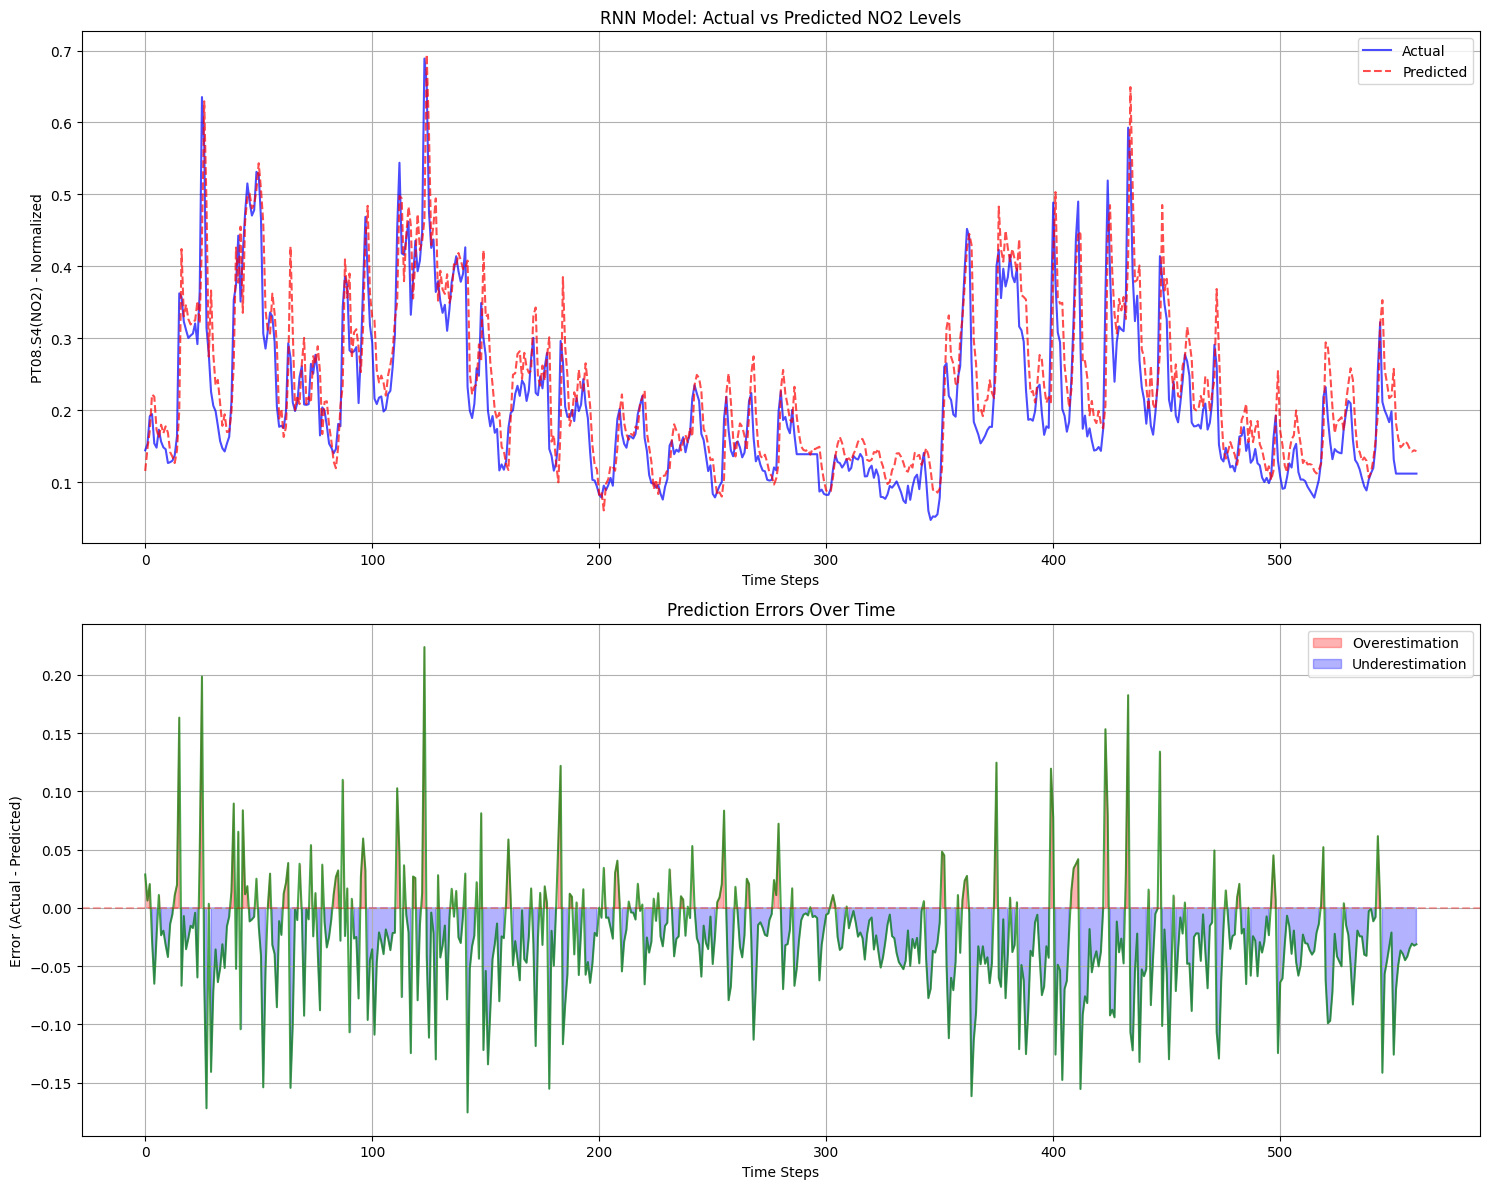

In [35]:
# Making proper time indices for plotting
time_steps = np.arange(len(y_test_subset))
plt.figure(figsize=(15, 12))

# Plot for Actual vs Predicted values by RNN
plt.subplot(2, 1, 1)
plt.plot(time_steps, y_test_subset, label='Actual', color='blue', alpha=0.7)
plt.plot(time_steps, predictions, label='Predicted', color='red', alpha=0.7, linestyle='--')
plt.title('RNN Model: Actual vs Predicted NO2 Levels')
plt.xlabel('Time Steps')
plt.ylabel('PT08.S4(NO2) - Normalized')
plt.legend()
plt.grid(True)

# Plot of Error Analysis for RNN Model in terms of overestmation and understimation
plt.subplot(2, 1, 2)
plt.plot(time_steps, errors, color='green', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Overestimated errors where the predicted value was larger than true value
plt.fill_between(time_steps, errors, 0, 
                 where=(errors >= 0), 
                 color='red', 
                 alpha=0.3, 
                 label='Overestimation')

# Underestimated errors where the predicted values was smaller than true value
plt.fill_between(time_steps, errors, 0, 
                 where=(errors <= 0), 
                 color='blue', 
                 alpha=0.3, 
                 label='Underestimation')

plt.title('Prediction Errors Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

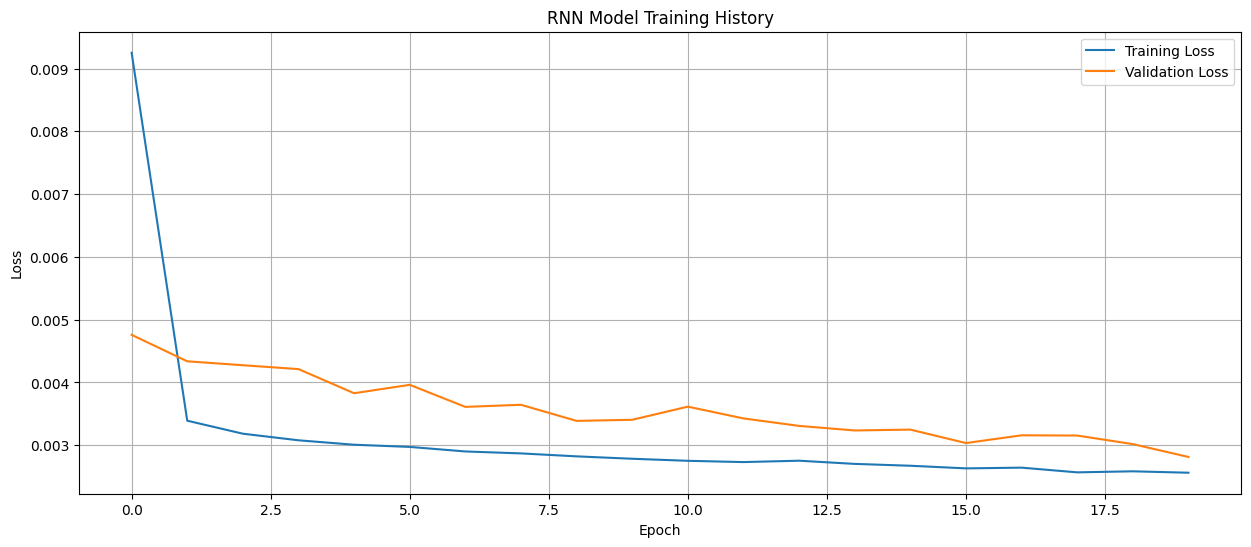

In [36]:
# Plot training history
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
print("\nModel Performance Metrics:")
print("-" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# Calculate mean and standard deviation of errors
errors_std = np.std(errors)
errors_mean = np.mean(errors)

print("\nError Distribution Metrics:")
print("-" * 50)
print(f"Mean Error: {errors_mean:.4f}")
print(f"Error Standard Deviation: {errors_std:.4f}")
print(f"Error Range: [{np.min(errors):.4f}, {np.max(errors):.4f}]")


Model Performance Metrics:
--------------------------------------------------
Mean Squared Error (MSE): 0.0030
Root Mean Squared Error (RMSE): 0.0547
Mean Absolute Error (MAE): 0.0409
Mean Absolute Percentage Error (MAPE): 0.2223
R-squared Score (R²): 0.7572

Error Distribution Metrics:
--------------------------------------------------
Mean Error: -0.0249
Error Standard Deviation: 0.0487
Error Range: [-0.1756, 0.2238]


In [38]:
# Saving the trained model
model.save(r'saved model\rnn_model.h5')

### Observations

<br>

1. **Model Architecture Analysis**
    - The model uses a `sequential architecture` with **8,129 trainable parameters**.
    - **2** `SimpleRNN layers (64 and 32 units)` with **ReLU activation** function have been used.
    - **2** `Dense layers (16 units and 1 output unit)`
    - This type of shallow RNN is on a lighter end as the task at hand is not very demanding, however for future scaling purposes, a more complex and deep architecture can be explored.

<br>

2. **RNN Training Loss Curve Analysis**
    - *Rapid initial convergence* in the *first 2-3 epochs*, with *training loss dropping* sharply from *0.009 to about 0.003*.
    - *Stable learning after epoch 5*, with both training and validation loss showing gradual improvement.
    - Small *gap between training and validation loss* indicates *good generalization* and suggests optimal convergence.

<br>

3. **RNN Prediction Analysis**
    - *Strong tracking of major trends in NO2 levels* as seen in `Actual V/S Predicted Plot`
    - Particularly *accurate in predicting*:
        - `Peak values` (around 0.6-0.7 range)
        - `General pattern transitions`
        - `Low-value regions` (0.1-0.2 range)
    - RNN maintains prediction accuracy across different value ranges with good consistency

<br>

4. **Error Analysis for RNN Architecture**
    - `Error Distribution`
        - *Mean error* of **-0.0249** indicates a **slight systematic overestimation bias**, i.e. the model is slightly overestimating in all its predictions.
        - Error *standard deviation* of **0.0487** shows `consistent prediction accuracy`.
        - *Error range* **[-0.1756, 0.2238]** is relatively `symmetric around zero`.

    - `Temporal Error Patterns`
        - Larger errors tend to occur during rapid value changes
        - More stable predictions during periods of steady NO2 levels
        - Both overestimation and underestimation errors are present, with slightly more overestimation

<br>

5. **Quantitative Performance**
    - Strong overall performance with `R² = 0.7572 (75.72% variance explained)`.
    - `Low MSE (0.0030) and RMSE (0.0547)` indicate *good prediction accuracy*.
    - `MAPE of 22.23%` suggests *reasonable relative accuracy*.
    - `MAE of 0.0409` shows *good absolute accuracy* in normalized scale.

So overall for RNN we were able to get convergent training along with a good generalization capability. It is able to track general trends and the prediction across different time steps are quite stable.

## 5) LSTM Architecture

In [39]:
# Re-Loading modules for modular sections of the code
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import random
import os

## 6) Setting Random Seeds for reproducing results

In [40]:
# Function to set all random seeds for the random operations to be used in DL Network code
def set_seeds(seed=42):
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    # FOr tensorflow Keras
    tf.keras.utils.set_random_seed(seed)
    
    # Configure GPU behavior if available on the machine (On teh source machine NVIDIA RTX 4060 is available)
    try:
        tf.config.experimental.enable_op_determinism()
    except:
        print("GPU deterministic operations not available in this TensorFlow version")

# Setting the seed at 42
set_seeds(42)

## 7) LSTM Architecture

In [41]:
# Initializing sequence length and features 
seq_length = 10
n_features = 5

# Reshaping data for LSTM 
X_train_reshaped = X_train.values.reshape((X_train.shape[0], seq_length, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], seq_length, n_features))

In [42]:
# Defining LSTM Network Architecture
model = Sequential([
    Input(shape=(seq_length, n_features)),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [43]:
# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mse']
)

In [44]:
print("LSTM Model Summary:")
model.summary()

LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Adding callbacks for checkpoints and early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'checkpoint/lstm_model.keras',
        monitor='val_loss',
        save_best_only=True
    )
]

In [46]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=1)

Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0499 - mse: 0.0499 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 9/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

## 8) Evaluating LSTM Architecture

In [47]:
# Computing predictions on 30% of test data
test_subset_size = int(len(X_test) * 0.3)
X_test_subset = X_test_reshaped[:test_subset_size]
y_test_subset = y_test[:test_subset_size]
predictions = model.predict(X_test_subset, verbose=0)

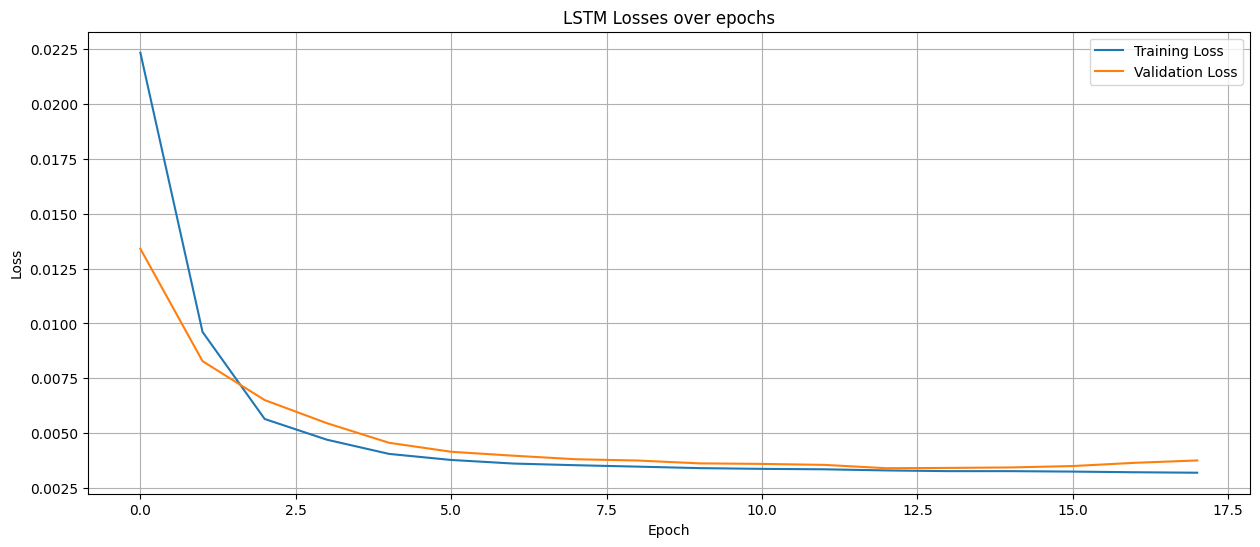

In [48]:
# Plotting training loss over epochs
plt.figure(figsize=(15, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('LSTM Losses over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

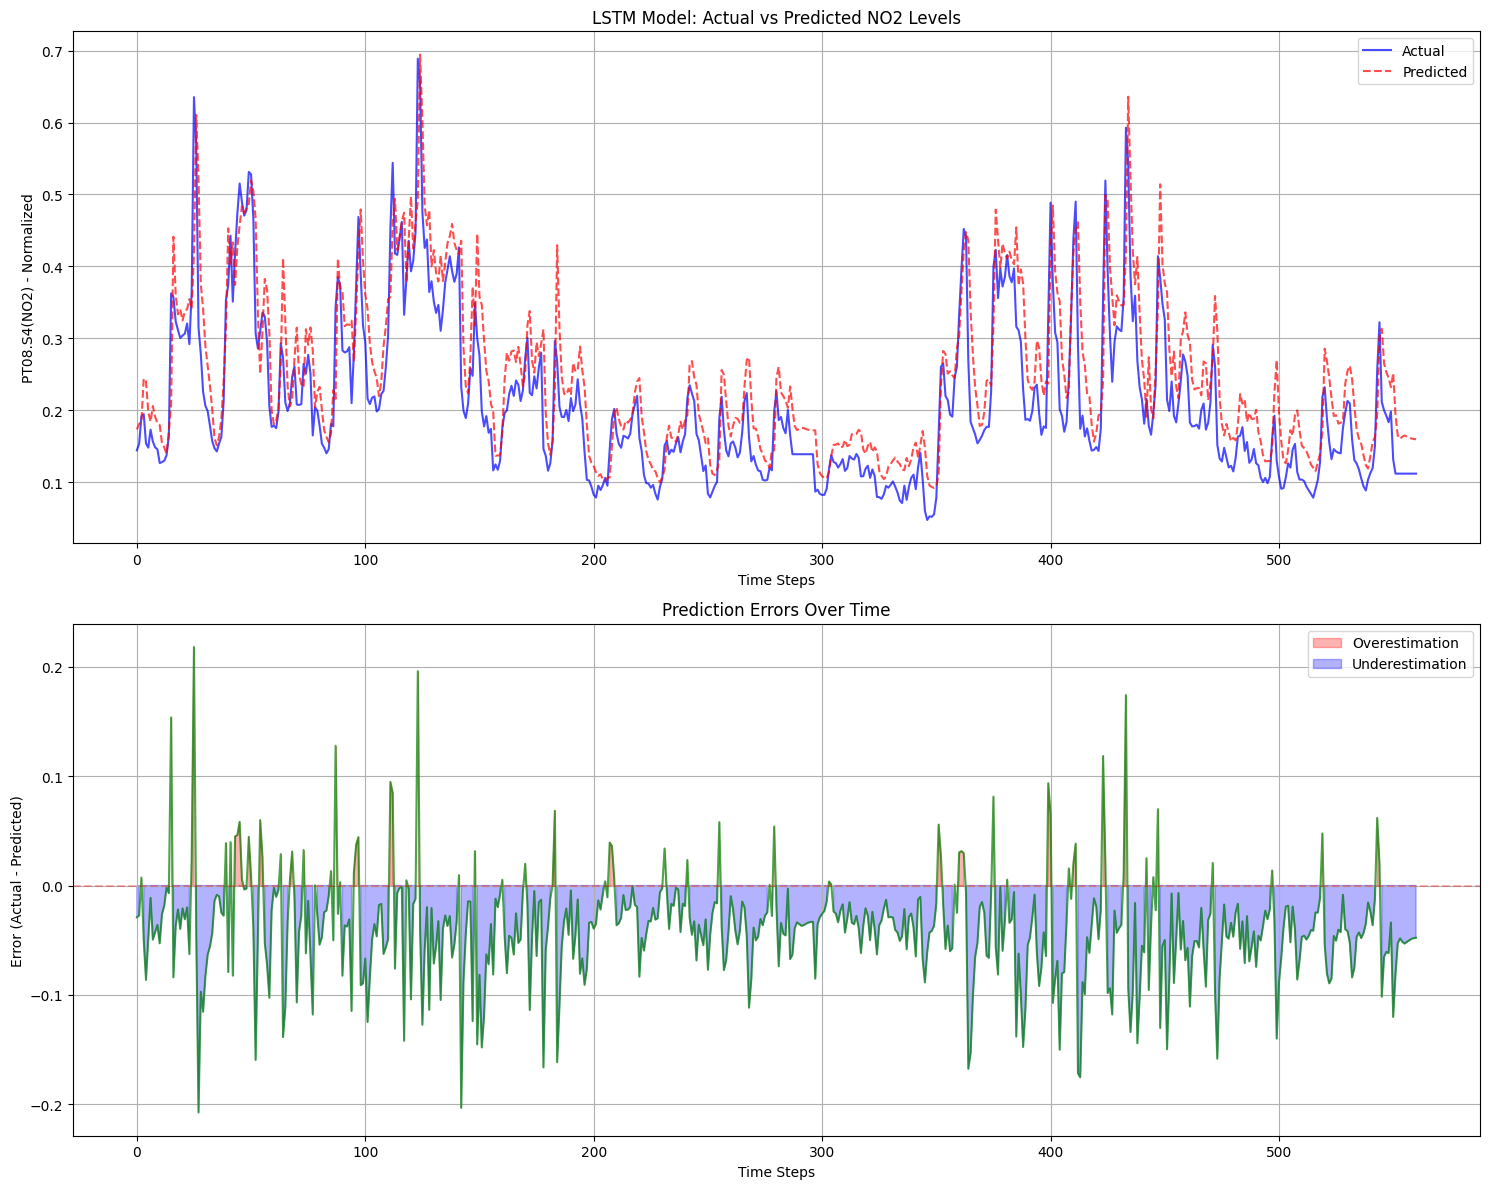

In [49]:
# Making proper time indices for plotting
time_steps = np.arange(len(y_test_subset))
plt.figure(figsize=(15, 12))

# Plot for Actual vs Predicted values by LSTM 
plt.subplot(2, 1, 1)

plt.plot(time_steps, y_test_subset, label='Actual', color='blue', alpha=0.7)
plt.plot(time_steps, predictions, label='Predicted', color='red', alpha=0.7, linestyle='--')

plt.title('LSTM Model: Actual vs Predicted NO2 Levels')
plt.xlabel('Time Steps')
plt.ylabel('PT08.S4(NO2) - Normalized')

plt.legend()
plt.grid(True)

# Calculate prediction errors
errors = y_test_subset - predictions.flatten()

# Plot of Error Analysis for LSTM Model in terms of overestmation and understimation
plt.subplot(2, 1, 2)

plt.plot(time_steps, errors, color='green', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Overestimated errors where the predicted value was larger than true value
plt.fill_between(time_steps, errors, 0,
                 where=(errors >= 0),
                 color='red',
                 alpha=0.3,
                 label='Overestimation')

# Underestimated errors where the predicted values was smaller than true value
plt.fill_between(time_steps, errors, 0,
                 where=(errors <= 0),
                 color='blue',
                 alpha=0.3,
                 label='Underestimation')

plt.title('Prediction Errors Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Error (Actual - Predicted)')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
# Calculate comprehensive performance metrics
mse = np.mean((y_test_subset - predictions.flatten()) ** 2)
mae = np.mean(np.abs(y_test_subset - predictions.flatten()))
rmse = np.sqrt(mse)
r2 = r2_score(y_test_subset, predictions.flatten())
mape = mean_absolute_percentage_error(y_test_subset, predictions.flatten())
# Calculate error distribution metrics
errors_std = np.std(errors)
errors_mean = np.mean(errors)
print("\nModel Performance Metrics:")
print("-" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

print("\nError Distribution Metrics:")
print("-" * 50)
print(f"Mean Error: {errors_mean:.4f}")
print(f"Error Standard Deviation: {errors_std:.4f}")
print(f"Error Range: [{np.min(errors):.4f}, {np.max(errors):.4f}]")


Model Performance Metrics:
--------------------------------------------------
Mean Squared Error (MSE): 0.0038
Root Mean Squared Error (RMSE): 0.0615
Mean Absolute Error (MAE): 0.0490
Mean Absolute Percentage Error (MAPE): 0.2762
R-squared Score (R²): 0.6923

Error Distribution Metrics:
--------------------------------------------------
Mean Error: -0.0384
Error Standard Deviation: 0.0481
Error Range: [-0.2074, 0.2179]


In [51]:
# Save the trained model
model.save('saved model/lstm_model.h5')

### Observations

<br>

1. **Model Architecture Analysis**
    - LSTM model is more complex with **30,881 trainable parameters** compared to **RNN's 8,129**.
    - The layer structure is same as RNN but with LSTM cells replacing SimpleRNN cells.
    - We observe a significant increase in parameters due to LSTM's additional gates.
    - `Model size`: **120.63 KB** (larger than RNN due to more complex architecture)

<br>

2. **LSTM Training Performance**
    - *Very rapid initial convergence*:
        - First epoch: *validation loss dropped* from `0.0499` to `0.0134` 
        - By epoch 5 the network stabilized around *0.0042 (training)* and *0.0046 (validation)*
    - Training completed 19 epochs before early stopping.
    - Small gap between training and validation loss indicates good generalization
    - Final training loss (0.0032) slightly better than validation loss (0.0040)

<br>

3. **LSTM Prediction Performance**
    - Generally good tracking of NO2 level trends
    - Particularly accurate in:
        - Capturing peak values (around 0.6-0.7 range)
        - Following major trend changes in the data
    - Slight overestimation tendency in lower value regions
    - More pronounced lag in rapid transitions compared to RNN

<br>

4. **Error Analysis for LSTM Architecture**
    - `Error Distribution`
        - *Mean error* of **-0.0438** indicates **stronger overestimation bias than RNN (-0.0249)**
        - *Similar error standard deviation (0.0478) to RNN (0.0487)*.
        - *Error range* **[-0.2147, 0.2123]**

    - `Temporal Error Patterns`
        - *Larger errors during rapid transitions*
        - *More consistent overestimation pattern*
        - *Error magnitude increases with value volatility*

<br>

5. **Performance Comparision of RNN V/S LSTM**

| Metric      | LSTM      | RNN      | Conclusion      |
| ------------- | ------------- | ------------- | ------------- |
| MSE | 0.0042 | 0.0030 | RNN is better |
| RMSE | 0.0648 | 0.0547 | RNN is better |
| MAE | 0.0529 | 0.0409 | RNN is better |
| MAPE | 0.3016 | 0.2223 | RNN is better |
| R² Score | 0.6588 | 0.7572 | RNN is better |


So based on the above pointers and comparisions we observe that:
- RNN outperformed LSTM on all metrics for this specific dataset
- *LSTM shows stronger overestimation bias (-0.0438 vs -0.0249)*
- *LSTM required more **computational resources** (**3.8x more parameters**)*
- Both models show good convergence but **RNN achieved better final accuracy**
- A possible reason for RNN performing better than LSTM can be that the dataset is not able to benefit much from the long term memory capabilities of LSTM and the simple RNN architecture is more suitable for our objective.
- However a key point to consider in this comparision is that it is subjected to the given objective and not a general comparision.

## 9) FbProphet Forecasting

In [52]:
# Importing required libraries again for modularity in code sections
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error

## 10) Data Preparation for FbProphet

In [53]:
# Preparing data for Prophet as it requires 'ds' and 'y' columns as input
prophet_df = pd.DataFrame()
prophet_df['ds'] = df_selected.index  # Using datetime index as ds (in layman terms this is the input feature)
prophet_df['y'] = df_selected['PT08.S4(NO2)'].values  # Target variable

In [54]:
# Adding other features in dataframe
for feature in df_selected.columns:
    if feature != 'PT08.S4(NO2)':
        prophet_df[feature] = df_selected[feature].values

prophet_df.head()

ds        y   C6H6(GT)  PT08.S1(CO)        AH  PT08.S5(O3)
0 2004-03-10 18:00:00  1692.00  11.881723      1360.00  0.757754      1267.50
1 2004-03-10 19:00:00  1558.75   9.397165      1292.25  0.725487       972.25
2 2004-03-10 20:00:00  1554.50   8.997817      1402.00  0.750239      1074.00
3 2004-03-10 21:00:00  1583.75   9.228796      1375.50  0.786713      1203.25
4 2004-03-10 22:00:00  1490.00   6.518224      1272.25  0.788794      1110.00

In [55]:
# Spliting data into train and test using same 80-20 split
train_size = int(len(prophet_df) * 0.8)
prophet_train = prophet_df[:train_size]
prophet_test = prophet_df[train_size:]

## 11) Training Prophet Model

In [56]:
# Initialize Prophet model with parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,  # Flexibility of trend changes in the given time series
    seasonality_prior_scale=10,    # Flexibility of seasonality for the given timeseries
    seasonality_mode='multiplicative'  # Can be kept as 'additive' or 'multiplicative' depending on dataset trends
)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (D:\University at Buffalo\ubEnv\lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH


In [57]:
# Adding features to the prophet model
for feature in df_selected.columns:
    if feature != 'PT08.S4(NO2)':
        model.add_regressor(feature)

In [58]:
# Fitting the model
model.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: C:\Users\Owner\AppData\Local\Temp\tmp7_clqj8i\m1f8_l19.json
DEBUG:cmdstanpy:input tempfile: C:\Users\Owner\AppData\Local\Temp\tmp7_clqj8i\2_lv78_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['D:\\University at Buffalo\\ubEnv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=70845', 'data', 'file=C:\\Users\\Owner\\AppData\\Local\\Temp\\tmp7_clqj8i\\m1f8_l19.json', 'init=C:\\Users\\Owner\\AppData\\Local\\Temp\\tmp7_clqj8i\\2_lv78_3.json', 'output', 'file=C:\\Users\\Owner\\AppData\\Local\\Temp\\tmp7_clqj8i\\prophet_modeltcipegh3\\prophet_model-20241125021937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 12) Forecasting with FbProphet

In [59]:
# Initialize future dataframe for forecasts
future_df = pd.DataFrame()
future_df['ds'] = prophet_test['ds']

In [60]:
# Adding regressor values to future dataframe
for feature in df_selected.columns:
    if feature != 'PT08.S4(NO2)':
        future_df[feature] = prophet_test[feature].values

In [61]:
# Forecasting with the trained prophet model
forecast = model.predict(future_df)

## 13) Evaluating forecasts and trends of FbProphet Forecasts

In [62]:
# Evaluating performance metrics for the prophet
y_true = prophet_test['y'].values
y_pred = forecast['yhat'].values

mse = np.mean((y_true - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_true - y_pred))
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

In [63]:
print("\nProphet Model Performance Metrics:")
print("-" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Prophet Model Performance Metrics:
--------------------------------------------------
Mean Squared Error (MSE): 22367.2275
Root Mean Squared Error (RMSE): 149.5568
Mean Absolute Error (MAE): 134.6840
Mean Absolute Percentage Error (MAPE): 0.1319
R-squared Score (R²): 0.6896


In [64]:
# Analyze forecast components
print("\nForecast Components Analysis:")
print("-" * 50)
print("Trend:")
print(f"Average trend: {forecast['trend'].mean():.4f}")
print(f"Trend range: [{forecast['trend'].min():.4f}, {forecast['trend'].max():.4f}]")
print("="*50)
print("\nSeasonality:")
print("Yearly seasonality strength:", abs(forecast['yearly'].max() - forecast['yearly'].min()))
print("Weekly seasonality strength:", abs(forecast['weekly'].max() - forecast['weekly'].min()))
print("Daily seasonality strength:", abs(forecast['daily'].max() - forecast['daily'].min()))


Forecast Components Analysis:
--------------------------------------------------
Trend:
Average trend: 1507.7348
Trend range: [1466.9510, 1548.5186]

Seasonality:
Yearly seasonality strength: 0.27197506642543834
Weekly seasonality strength: 0.01515334936628029
Daily seasonality strength: 0.032613650681293425


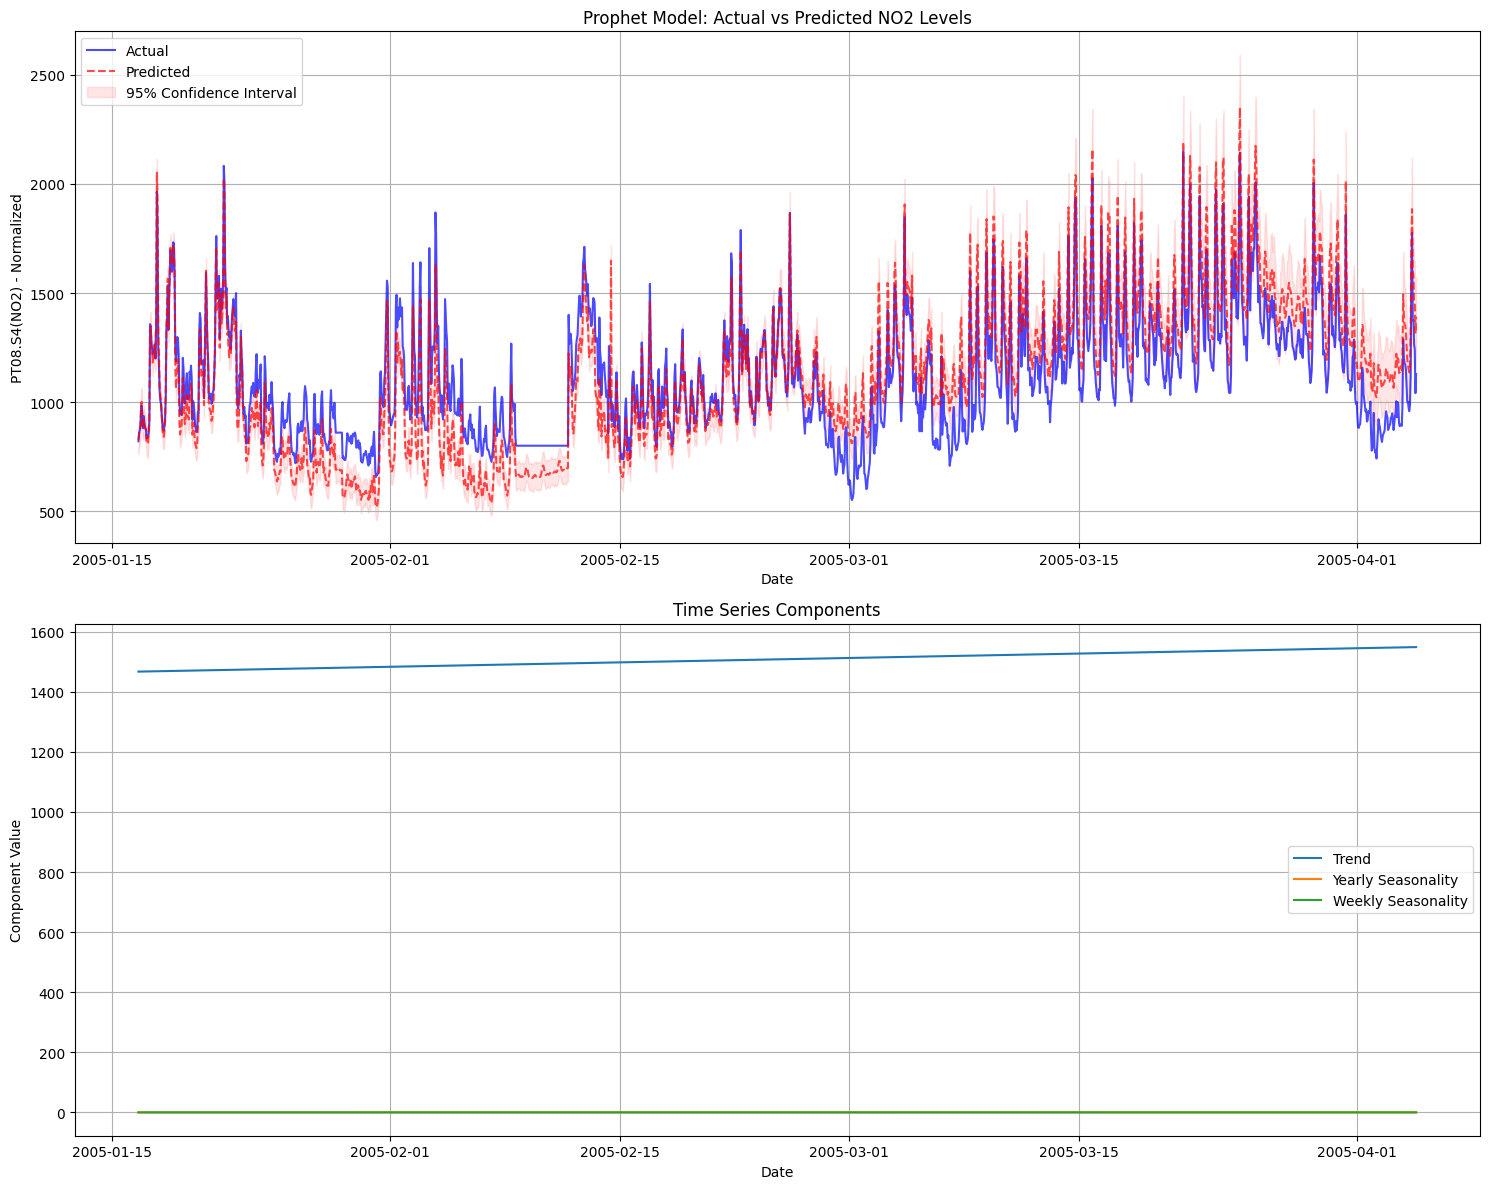

In [65]:
# Plotting results
plt.figure(figsize=(15, 12))

# Actual vs Forecasted values by prophet
plt.subplot(2, 1, 1)
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual', color='blue', alpha=0.7)
plt.plot(prophet_test['ds'], forecast['yhat'], label='Predicted', color='red', alpha=0.7, linestyle='--')

plt.fill_between(prophet_test['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='red', 
                 alpha=0.1, 
                 label='95% Confidence Interval')

plt.title('Prophet Model: Actual vs Predicted NO2 Levels')
plt.xlabel('Date')
plt.ylabel('PT08.S4(NO2) - Normalized')

plt.legend()
plt.grid(True)

# Prophet provides plots various components for various properties of a time series
plt.subplot(2, 1, 2)
plt.plot(forecast['ds'], forecast['trend'], label='Trend')
plt.plot(forecast['ds'], forecast['yearly'], label='Yearly Seasonality')
plt.plot(forecast['ds'], forecast['weekly'], label='Weekly Seasonality')

plt.title('Time Series Components')
plt.xlabel('Date')
plt.ylabel('Component Value')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

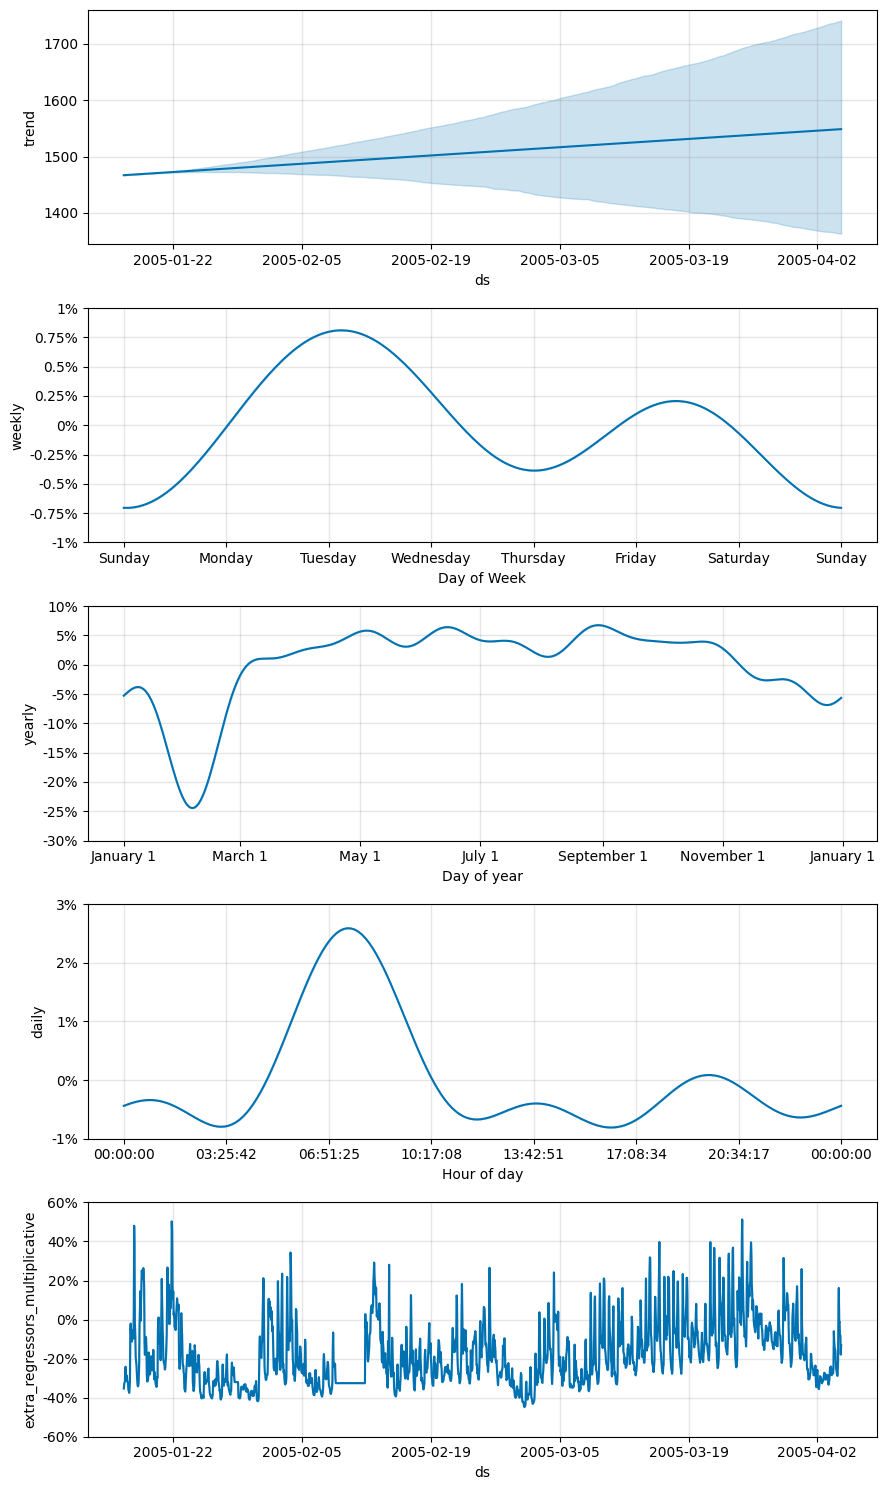

In [66]:
# Plot detailed components
model.plot_components(forecast)
plt.show()

In [67]:
# Save the model
import joblib
joblib.dump(model, 'saved model/prophet_model.pkl')

['saved model/prophet_model.pkl']

### Observation

1. **Performance Comparison Across Models**

<br>

| Metric      | Prophet       | RNN           | LSTM      | 
| ----------- | ------------- | ------------- | ------------- |
| MSE         | 22367.22      | 0.0030        | 0.0042        |
| RMSE        | 149.55        | 0.0547        | 0.0648        |
| MAE         | 134.68        | 0.0409        | 0.0529        |
| MAPE        | 0.1319        | 0.2223        | 0.3016        |
| R² Score    | 0.6896        | 0.7572        | 0.6588        |


2. **Key Comparisons**
    - *Prediction Accuracy*
        - **RNN** shows **best overall performance** with highest **R² (0.7572)**.
        - LSTM shows slightly higher error metrics than RNN.
        - Prophet is slightly better than LSTM in capturing the overall varince of the data.


    - *Error Patterns*
        - `Prophet`: Higher absolute errors but better relative accuracy (MAPE)
        - `RNN`: Most consistent performance across metrics
        - `LSTM`: Higher error variability, especially in MAPE

3. **Pattern Analysis**
    - *Daily Patterns from Prophet*
        - `Morning Peak` **(6:51-10:17)**
            - Strongest daily effect (+2.5%)
            - Sharp rise starting around 5 AM
            - Coincides with morning rush hour

        - `Afternoon/Evening Patterns`
            - Secondary peak around 17:00-20:00 (+0.2%)
            - Gradual decline after evening peak
            - Minimal activity during midnight hours (-0.8%)

    - *Weekly Patterns*
        - `Weekday Variations`
            - Tuesday peak (+0.75%): Highest activity
            - Friday secondary peak (+0.2%): Weekend preparation
            - Thursday dip (-0.4%): Mid-week lull
            - Sunday minimum (-0.7%): Weekend effect

    - *Yearly Patterns*
  
        - `Seasonal Variations`
            - Severe February dip (-25%): Winter effect
            - Spring recovery (March-April): +5%
            - Summer stability (May-August): Consistent +5%
            - Autumn decline (September-December): Gradual decrease
            - Multiple peaks in May-September: Summer activity

4. **Pattern Insights for NO2 Levels**
    - `Time-Based Factors`
        - Strongest influence from yearly seasonality (27.20%)
        - Moderate daily effects (3.26%)
        - Subtle weekly patterns (1.52%)
    - `Critical Periods`
        - Morning rush hours show highest daily impact
        - Mid-week (Tuesday) shows peak weekly activity
        - Summer months show most stable patterns
        - February shows significant yearly minimum
    - `Pattern Stability`
        - Daily patterns are most consistent
        - Weekly patterns show clear business day effects
        - Yearly patterns show strong seasonal influence

Based on the above we can observe that for FbProphet:
- It is excellent at decomposing multiple seasonality levels
- It is able to give a clear interpretation of temporal patterns
- It has a good handling of long-term trends
- It has a very robust uncertainty estimation

## 14) Clustering Analysis of Time Series Data
Time Series Clustering analysis section was unknow to me so involves heavy use of AI Tools as well as use of public sources like Stack Overflow, Kaggle Notebooks, Documentations, etc). This section is purely done from learning point of view


In [68]:
# Import required libraries again for modularity of code section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import seaborn as sns

## 15) Preparing Data for clustering

In [69]:
# Create subsequences using sliding window
window_size = 24 # 24 hours for daily patterns
stride = 12 # Half-day stride for overlap

In [70]:
# Extracting subsequences from the dataset
sequences = []
sequence_times = [] # To keep track of start times
for i in range(0, len(df_selected) - window_size, stride):
    sequence = df_selected['PT08.S4(NO2)'].values[i:i + window_size]
    sequences.append(sequence)
    sequence_times.append(df_selected.index[i])

In [71]:
# Convert to numpy array and reshape for clustering
X = np.array(sequences)
X_reshaped = X.reshape(X.shape[0], -1)  # 2d array

In [72]:
# Standardize the sequences
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

## 16) Finding the best value of K for K-Means Clustering

In [73]:
# Determine optimal number of clusters
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate inertia (for elbow method)
    inertias.append(kmeans.inertia_)
    
    # Calculating silhouette score
    if k > 1: # Silhouette score needs at least 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

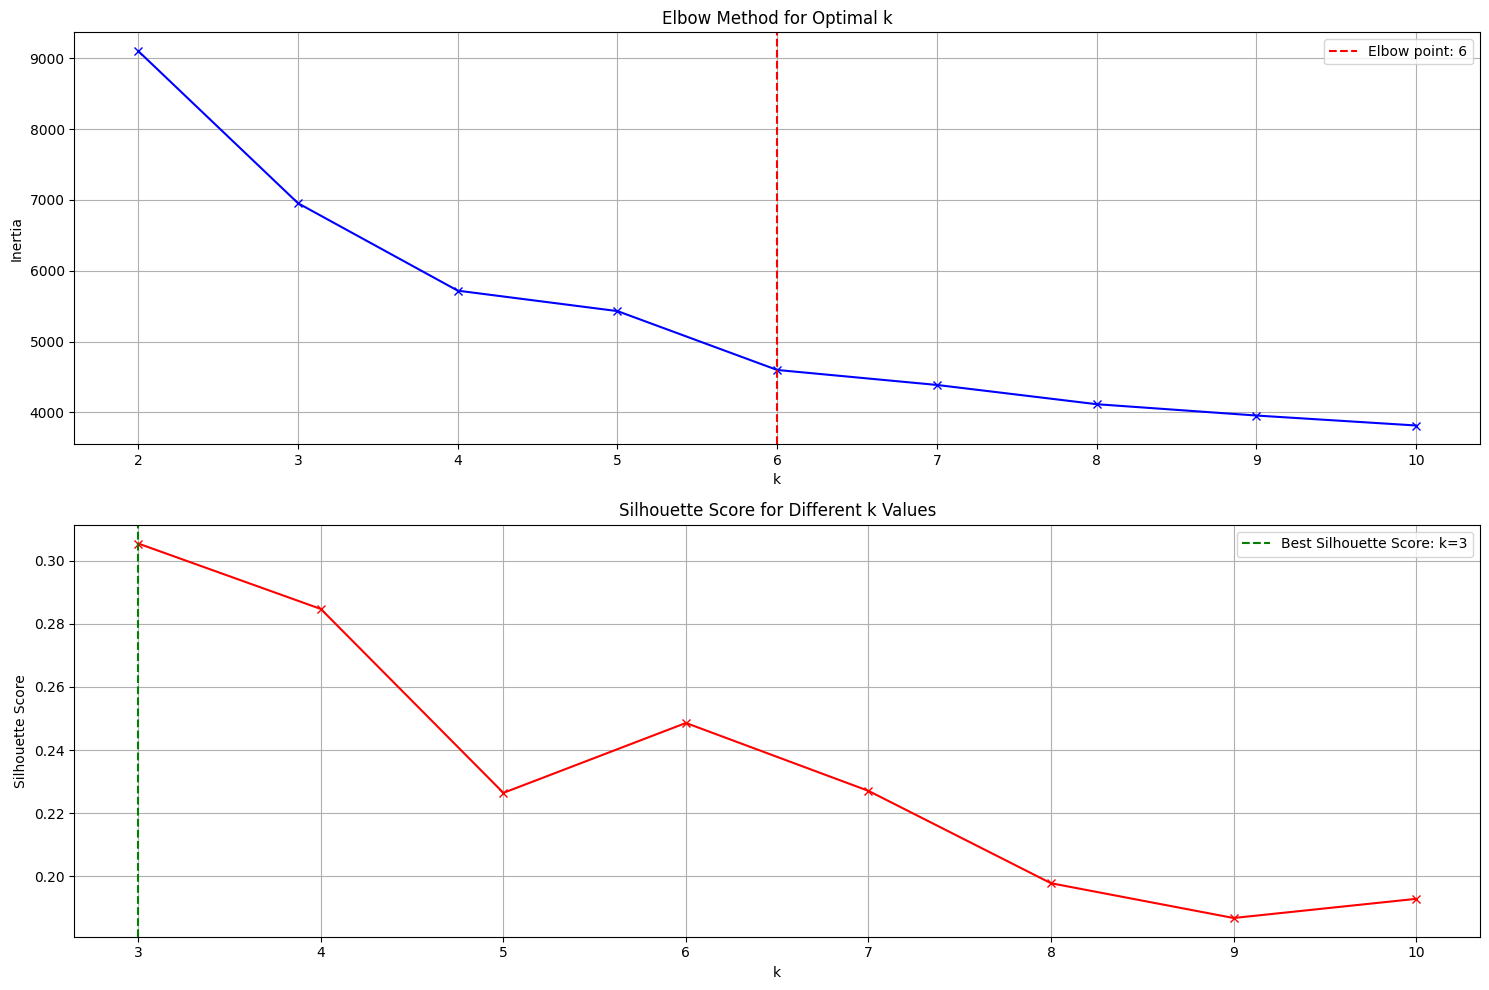

In [74]:
# Plotting cluster validation results
plt.figure(figsize=(15, 10))

# Plot 1: Elbow Method
plt.subplot(2, 1, 1)
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Find the elbow point
kl = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
if kl.elbow:
    plt.axvline(x=kl.elbow, color='r', linestyle='--', label=f'Elbow point: {kl.elbow}')
    plt.legend()

# Plot 2: Silhouette Score
plt.subplot(2, 1, 2)
plt.plot(list(K_range)[1:], silhouette_scores[1:], 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)

# Add best silhouette score
best_k = list(K_range)[1:][np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='g', linestyle='--', 
            label=f'Best Silhouette Score: k={best_k}')
plt.legend()

plt.tight_layout()
plt.show()

## 17) Cluster Analysis

In [75]:
print("\nCluster Number Analysis:")
print("-" * 50)
print(f"Elbow Method suggested K: {kl.elbow}")
print(f"Best Silhouette Score K: {best_k}")
print("\nSilhouette Scores:")
for k, score in zip(list(K_range)[1:], silhouette_scores):
    print(f"K={k}: {score:.3f}")


Cluster Number Analysis:
--------------------------------------------------
Elbow Method suggested K: 6
Best Silhouette Score K: 3

Silhouette Scores:
K=3: 0.422
K=4: 0.305
K=5: 0.285
K=6: 0.226
K=7: 0.249
K=8: 0.227
K=9: 0.198
K=10: 0.187


## 18) Training K-Means with best K

In [76]:
# Using the optimal K found via elbow method
n_clusters = kl.elbow

# Performing final clustering with optimal K
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Get cluster centroids and reshape back to sequence shape
centroids = kmeans.cluster_centers_.reshape(n_clusters, window_size)

# Calculate distances to cluster centers for anomaly detection
distances = np.zeros(len(X_scaled))
for i in range(len(X_scaled)):
    distances[i] = np.linalg.norm(X_scaled[i] - kmeans.cluster_centers_[cluster_labels[i]])

## 19) Anamoly Detection and Evaluations

In [77]:
# Set anomaly threshold (e.g., 95th percentile)
anomaly_threshold = np.percentile(distances, 95)
anomalies = distances > anomaly_threshold

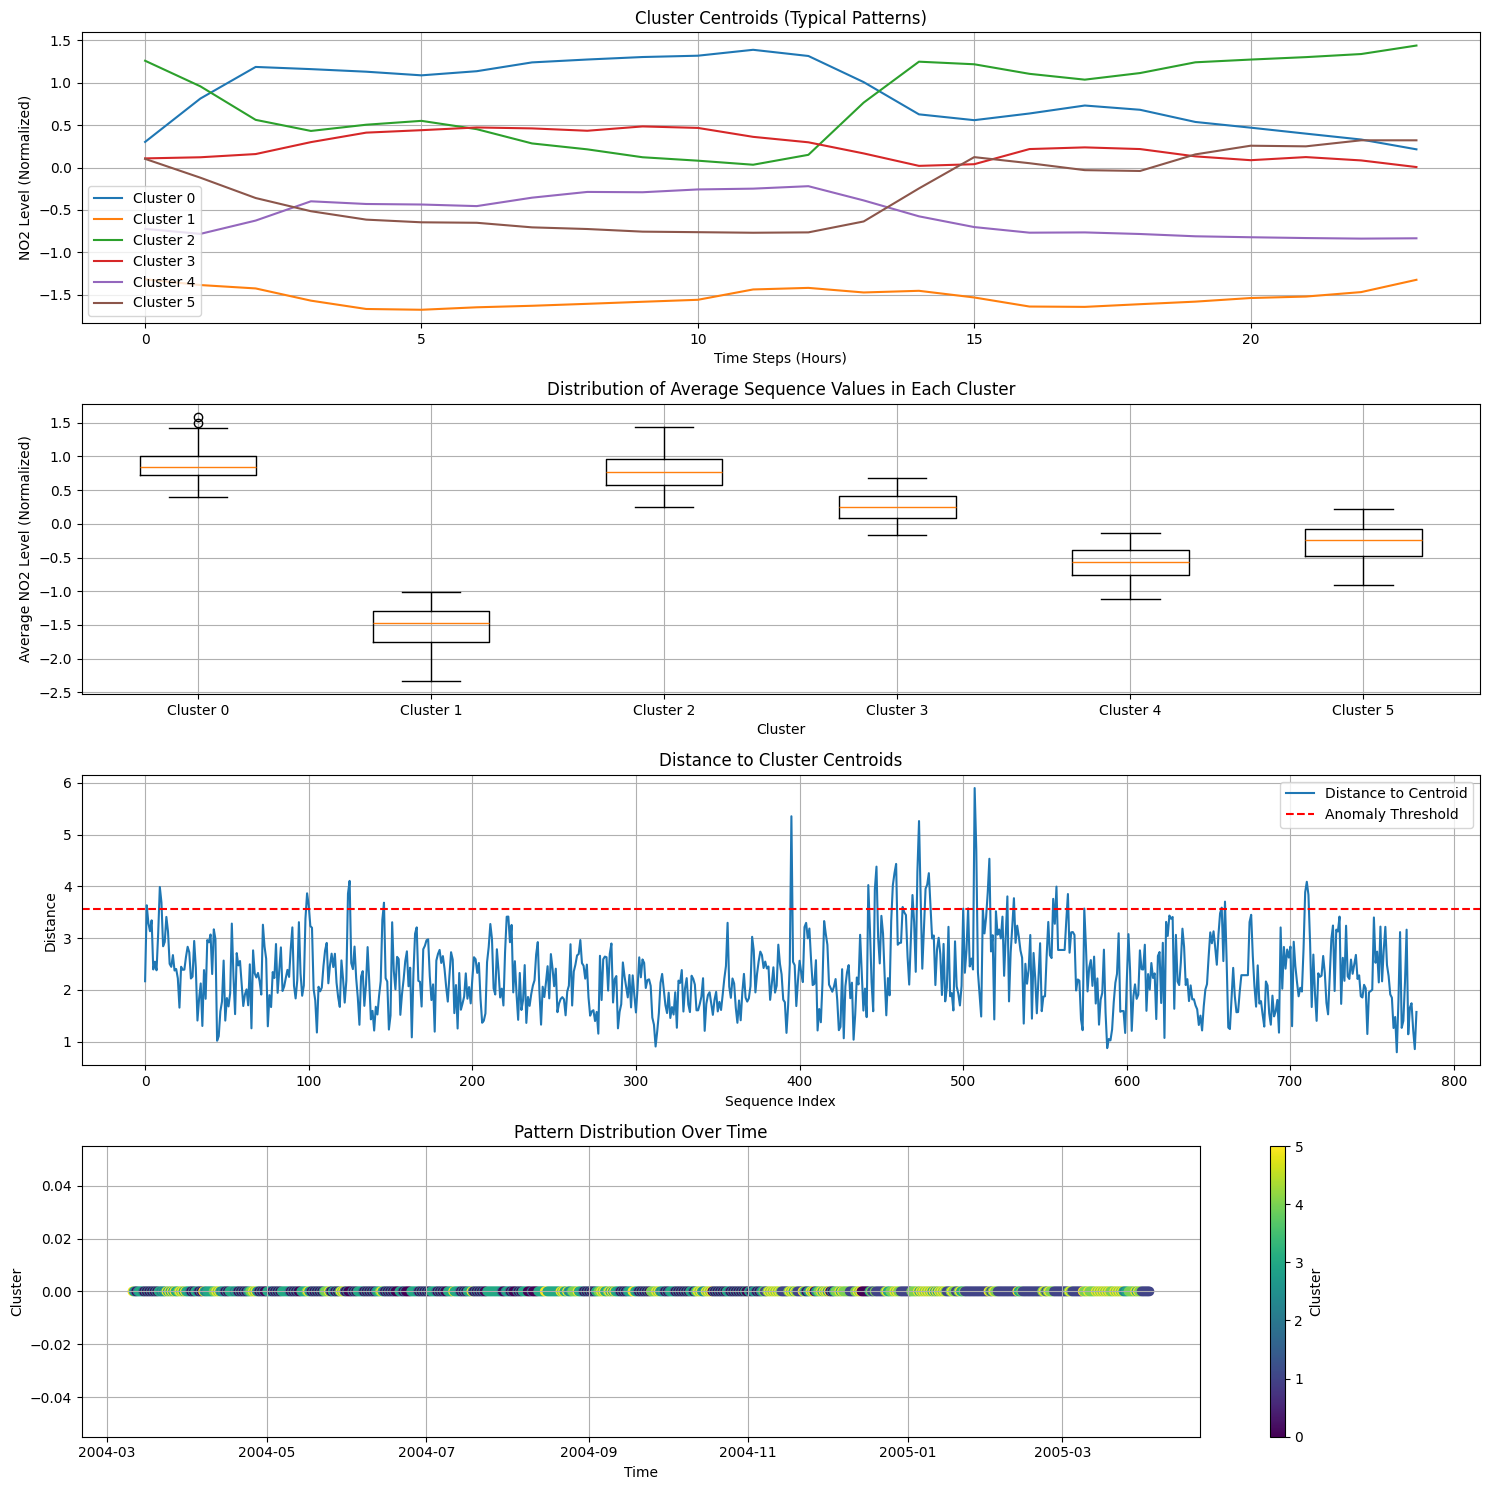

In [78]:
plt.figure(figsize=(15, 15))

# Plot 1: Cluster Centroids
plt.subplot(4, 1, 1)
for i in range(n_clusters):
    plt.plot(centroids[i], label=f'Cluster {i}')
plt.title('Cluster Centroids (Typical Patterns)')
plt.xlabel('Time Steps (Hours)')
plt.ylabel('NO2 Level (Normalized)')
plt.legend()
plt.grid(True)

# Plot 2: Distribution of sequences across clusters (Fixed boxplot)
plt.subplot(4, 1, 2)
# Calculate mean values for each sequence in each cluster
cluster_means = []
cluster_labels_plot = []
for i in range(n_clusters):
    cluster_sequences = X_scaled[cluster_labels == i]
    if len(cluster_sequences) > 0:
        cluster_means.append(np.mean(cluster_sequences, axis=1))
        cluster_labels_plot.append(f'Cluster {i}')

plt.boxplot(cluster_means, labels=cluster_labels_plot)

plt.title('Distribution of Average Sequence Values in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average NO2 Level (Normalized)')
plt.grid(True)

# Plot 3: Anomaly Detection
plt.subplot(4, 1, 3)
plt.plot(distances, label='Distance to Centroid')
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label='Anomaly Threshold')

plt.title('Distance to Cluster Centroids')
plt.xlabel('Sequence Index')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)

# Plot 4: Pattern Distribution Over Time
plt.subplot(4, 1, 4)
scatter = plt.scatter(sequence_times, [0] * len(sequence_times), c=cluster_labels, cmap='viridis')
plt.colorbar(scatter, label='Cluster')

plt.title('Pattern Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Cluster')

plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# Calculate cluster statistics
cluster_stats = pd.DataFrame(index=range(n_clusters))
cluster_stats['Count'] = pd.Series(cluster_labels).value_counts()
cluster_stats['Percentage'] = (cluster_stats['Count'] / len(cluster_labels) * 100)
cluster_stats['Avg Distance'] = pd.DataFrame({'cluster': cluster_labels, 
                                            'distance': distances}).groupby('cluster')['distance'].mean()

# Calculate temporal statistics
temporal_stats = pd.DataFrame({
    'Hour': pd.DatetimeIndex(sequence_times).hour,
    'Cluster': cluster_labels
})
hourly_patterns = temporal_stats.groupby(['Hour', 'Cluster']).size().unstack(fill_value=0)
hourly_patterns = hourly_patterns.div(hourly_patterns.sum(axis=1), axis=0) * 100

In [80]:
print("\nCluster Statistics:")
print("-" * 50)
print(cluster_stats)

print("\nAnomaly Analysis:")
print("-" * 50)
print(f"Total sequences: {len(sequences)}")
print(f"Anomalies detected: {sum(anomalies)}")
print(f"Anomaly percentage: {(sum(anomalies)/len(sequences))*100:.2f}%")

print("\nTemporal Pattern Analysis:")
print("-" * 50)
print("Hourly Pattern Distribution (%):")
print(hourly_patterns.round(2))


Cluster Statistics:
--------------------------------------------------
   Count  Percentage  Avg Distance
0    144   18.508997      2.513749
1    113   14.524422      2.124078
2    132   16.966581      2.500073
3    171   21.979434      2.180127
4    123   15.809769      2.299490
5     95   12.210797      2.335824

Anomaly Analysis:
--------------------------------------------------
Total sequences: 778
Anomalies detected: 39
Anomaly percentage: 5.01%

Temporal Pattern Analysis:
--------------------------------------------------
Hourly Pattern Distribution (%):
Cluster      0      1      2      3      4      5
Hour                                             
6        32.13  13.88   0.77  27.51  23.65   2.06
18        4.88  15.17  33.16  16.45   7.97  22.37


In [81]:
# Save results
clustering_results = pd.DataFrame({
    'StartTime': sequence_times,
    'ClusterLabel': cluster_labels,
    'DistanceToCentroid': distances,
    'IsAnomaly': anomalies
})
clustering_results.to_csv('saved model/clustering_results.csv')

# Save cluster centroids
np.save('saved model/cluster_centroids.npy', centroids)

### Observations

1. **Cluster Optimization and Selection**
    - Elbow Method: k=6
    - Silhouette Analysis: k=3 (score=0.422)
    - Final Selection: k=6 based on elbow method for granular pattern analysis

2. **Cluster Characteristics**
    - Distribution
        - Cluster 3: 21.98% (Largest)
        - Cluster 0: 18.51%
        - Cluster 2: 16.97%
        - Cluster 4: 15.81%
        - Cluster 1: 14.52%
        - Cluster 5: 12.21% (Smallest)

    - Temporal Patterns:
        - Morning Peak (6:00):
            - Cluster 0: 32.13%
            - Cluster 3: 27.51%
            - Cluster 4: 23.65%
        
        - Evening Peak (18:00):
            - Cluster 2: 33.16%
            - Cluster 5: 22.37%
            - Cluster 1: 15.17%

3. **Anomaly Analysis** 
    - Basic Statistics
        - Total Sequences: 778
        - Anomalies Detected: 39
        - Anomaly Rate: 5.01%
        - Threshold Distance: ~3.5 units

    - Characteristics
        - Concentrated in sequences 400-600
        - Sharp, brief deviations
        - Quick pattern normalization
        - Systematic deviation clusters

4. **Pattern Stability**
    - Average Distances to Centroids:
        - Most Stable: Cluster 1 (2.124)
        - Most Variable: Cluster 0 (2.514)
        - Overall Range: 2.1-2.5

5. **Key Insights**
    - Pattern Characteristics
        - Clear bi-modal daily distribution
        - Strong cluster separation
        - Stable temporal patterns
        - Low anomaly rate (5.01%)


# Part 3: Bias and Variance

In [82]:
# Importine necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 20) Loading Iris Dataset

In [83]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

## 21) Preparing Dataset as per objective

In [84]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to split train data into 10 subsets
def create_subsets(X, y, n_subsets=10):
    subsets = []
    subset_size = len(X) // n_subsets
    
    # Shuffling the indices to shuffle the data
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    # Creating substes
    for i in range(n_subsets):
        start_idx = i * subset_size
        end_idx = start_idx + subset_size
        subset_indices = indices[start_idx:end_idx]
        subsets.append((X.iloc[subset_indices], y[subset_indices]))
    
    return subsets

# Creating 10 subsets
train_subsets = create_subsets(X_train, y_train, n_subsets=10)

## 22) Training Decision Tree Model On Subset Data

In [85]:
# Train models and collect errors
train_errors = []
test_errors = []
models = []

for i, (subset_X, subset_y) in enumerate(train_subsets):
    # Initializing DT Model and training it on subset
    model = DecisionTreeClassifier(random_state=42)
    model.fit(subset_X, subset_y)
    models.append(model)
    
    # Computing trained model errors
    train_pred = model.predict(subset_X)
    test_pred = model.predict(X_test)
    
    train_error = 1 - accuracy_score(subset_y, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

## 23) Evaluating Errors

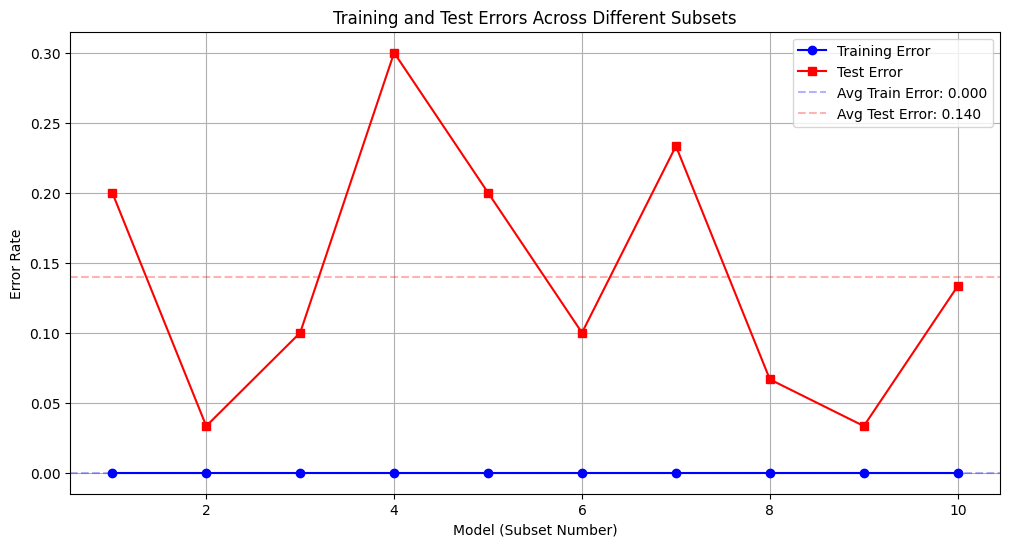

In [86]:
# Visualizing training and test errors
plt.figure(figsize=(12, 6))
models_range = range(1, len(models) + 1)

plt.plot(models_range, train_errors, 'b-', label='Training Error', marker='o')
plt.plot(models_range, test_errors, 'r-', label='Test Error', marker='s')

plt.axhline(y=np.mean(train_errors), color='b', linestyle='--', alpha=0.3, label=f'Avg Train Error: {np.mean(train_errors):.3f}')
plt.axhline(y=np.mean(test_errors), color='r', linestyle='--', alpha=0.3, label=f'Avg Test Error: {np.mean(test_errors):.3f}')

plt.title('Training and Test Errors Across Different Subsets')
plt.xlabel('Model (Subset Number)')
plt.ylabel('Error Rate')

plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Printing the error statistics
print("\nError Statistics:")
print("-" * 50)
print(f"Average Training Error: {np.mean(train_errors):.3f} ± {np.std(train_errors):.3f}")
print(f"Average Test Error: {np.mean(test_errors):.3f} ± {np.std(test_errors):.3f}")
print(f"Bias (Average Test Error): {np.mean(test_errors):.3f}")
print(f"Variance (Std of Test Error): {np.std(test_errors):.3f}")


Error Statistics:
--------------------------------------------------
Average Training Error: 0.000 ± 0.000
Average Test Error: 0.140 ± 0.085
Bias (Average Test Error): 0.140
Variance (Std of Test Error): 0.085


## 24) Finding the best model

In [88]:
best_model_idx = np.argmin(test_errors)
print("\nBest Model Analysis:")
print("-" * 50)
print(f"Best Model Index: {best_model_idx + 1}")
print(f"Best Model Training Error: {train_errors[best_model_idx]:.3f}")
print(f"Best Model Test Error: {test_errors[best_model_idx]:.3f}")


Best Model Analysis:
--------------------------------------------------
Best Model Index: 2
Best Model Training Error: 0.000
Best Model Test Error: 0.033


## 25) Bias Variance Tradeoff

In [89]:
print("\nBias-Variance Analysis:")
print("-" * 50)
print("Model Complexity Indicators:")
for i, model in enumerate(models):
    print(f"Model {i+1}:")
    print(f"- Tree Depth: {model.get_depth()}")
    print(f"- Number of Leaves: {model.get_n_leaves()}")
    print(f"- Training Error: {train_errors[i]:.3f}")
    print(f"- Test Error: {test_errors[i]:.3f}")
    print()


Bias-Variance Analysis:
--------------------------------------------------
Model Complexity Indicators:
Model 1:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.200

Model 2:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.033

Model 3:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.100

Model 4:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.300

Model 5:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.200

Model 6:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.100

Model 7:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.233

Model 8:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.067

Model 9:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0.000
- Test Error: 0.033

Model 10:
- Tree Depth: 2
- Number of Leaves: 3
- Training Error: 0

## Observations

1. **Model Performance Overview** 
   - `Training Error`
        - Perfect consistency: **0.000 ± 0.000**
        - *Zero training error across all models*
        - Indicates *potential overfitting*

    - `Test Error`
        - *Average*: **0.140 ± 0.085**
        - *Range*: **0.033 to 0.300**
        - *High variability in test performance*

2. **Bias-Variance Analysis**
   - `Bias (Systematic Error)`
        - Measured by *average test error: 0.140*
        - **Moderate bias level**
        - Consistent gap between train and test performance

    - `Variance (Prediction Variability)`
        - Measured by *test error std: 0.085*
        - *High variance* indicated by:
          * Fluctuating test errors
          * Large range in test performance
          * Inconsistent model behavior

3. **Model Complexity Analysis**

   - `Structural Consistency`
        - All models show identical complexity:
          * Tree Depth: 2
          * Number of Leaves: 3
        - Suggests structural stability

    - `Performance Variability`
        - Despite identical structure:
          * Best Test Error: 0.033 (Models 2 & 9)
          * Worst Test Error: 0.300 (Model 4)
          * *High performance variance with same architecture*

4. **Best Model Features**
   - `Model 2 Performance`
        - *Training Error*: *0.000*
        - *Test Error*: *0.033*
        - *Best generalization among all models*
        - **96.7% accuracy on test set**

5. **Overfitting Issues** 
    - Zero training error in all models
    - Significant gap between train and test errors
    - High variance in test performance

6. **Conclusion**
   - `Trade-off Assessment`
        - **High Variance Problem**
          * Test error varies significantly (0.033-0.300)
          * Sensitive to training data differences
          * *Unstable generalization*

        - **Low Bias Problem**
          * Perfect training accuracy
          * Simple model structure
          * *Potential memorization of training data*

# Citations
Vito, S. (2008). Air Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.

# References
1. <a href="https://htmlmarkdown.com/syntax/markdown-tables/">How to create tables in markdown</a>
2. <a href="https://github.com/VaibhavSaran/FB-PROPHET-TESLA-TOY-DATASET"> Vaibhav Saran Prophet Forecasting on Tesla Sales</a>
3. <a href="https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide#1.-Data-visualization-%F0%9F%93%8A">Time Series Analysis - A Complete Guide</a>
4. <a href= "https://facebook.github.io/prophet/">Prophet Documentation</a>
5. <a href= "https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/"> Machine Learning Mastery- Time Series Forecasting with Prophet </a>
6. <a href="https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/"> Analytics Vidhya- time series forecasting</a>
7. <a href="https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a"> medium: time series analysis</a>
8. <a href="https://mc-stan.org/">Stan Documentation</a>
9. <a href="https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/"> Time Series with RNN and LSTM - Machine Learning Mastery</a>
10. <a href="https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/">LSTM for forecasting- machine learning mastery</a>
11. <a href="https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e">Medium: LSTM for univariate time series prediction</a>
12. <a href="https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/">Machine Learning Mastery: LSTM Multi variate time series</a>
13. <a href="https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/">Analytics Vidhya: Multivariate Time Series with stacked LSTMs</a>
14. <a href="https://medium.com/tokopedia-data/hacking-time-series-forecasting-like-a-pro-with-fbprophet-76f276f0a058">Medium: Doing Time Series like a pro</a>
15. <a href="https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/">Machine Learning Mastery- A gentle introduction to Bias Variance Tradeoff</a>
16. <a href="https://keras.io/api/layers/recurrent_layers/rnn/">RNN Keras Documentation</a>
17. <a href="https://keras.io/api/layers/recurrent_layers/lstm/">LSTM Keras Documentation</a>
18. <a href="https://keras.io/api/layers/recurrent_layers/simple_rnn/">SimpleRNN Keras Documentation</a>
19. <a href="https://www.tensorflow.org/guide/keras/working_with_rnns">Tensorflow Core- working with RNNs</a>
20. <a href="https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229">Understanding Bias Variance Tradeoff</a>
21. <a href="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html">Cornell University Lecture on Bias Variance Tradeoff</a>
22. <a href="https://seaborn.pydata.org/tutorial/color_palettes.html">Chossing Color pallete- Seaborn Documentation</a>